## **1  Global Objective of the Analysis**

### **1.1  Goal**

Determine whether the World Bank’s education data provides sufficient and reliable insights to guide **Academy’s international expansion strategy** for online education services.

---

### **1.1.1  Specific Objectives**

* **Analytical Task:**
  Perform an **exploratory surface analysis** of the different datasets to evaluate their relevance, completeness, and potential to inform expansion decisions of Academy’s online education services.

  * **Deliverables:** Identify countries with high potential demand for Academy’s online education services, and analyze how that potential may evolve over time.
  * **Target Audience:** High school and university-level learners.

* Conclude whether the available data can yield **actionable insights** for prioritizing target countries in Academy’s international expansion strategy.

---

### **1.2  Dataset Overview**

The **World Bank EdStats database** comprises several interconnected datasets, each describing a different aspect of global education indicators.

All are linked by a common **Indicator Code / Series Code**, which uniquely identifies each variable.

* **EdStatsCountry:**
  Provides country-level attributes (name, ISO code, region, income group).

  * Defines the geographic and economic scope of analysis.

* **EdStatsCountry-Series:**
  Connects countries and indicators, including metadata such as sources and units.

  * Offers contextual details on data coverage and interpretation.

* **EdStatsData:**
  Contains the actual **indicator values by country and year**.

  * Serves as the core quantitative dataset for analysis.

* **EdStatsFootNote:**
  Includes explanatory comments or caveats for specific data points.

  * Adds interpretive context to numeric observations.

* **EdStatsSeries:**
  Lists all available indicators with names, definitions, and topical categories.


####  (A) Loading neccessary libraries 

In [1]:
# Paths and Display manipulation 
from pathlib import Path
from IPython.display import display, Markdown,HTML 



# Modules written consistent with poetry 
from project2.data.Filesloader import Reader # to load the files 
from project2.utils.DataInspector import BasicInfo,VisualInspector # display the basic info 
from project2.utils.Config import Config # configure the dispaly environment in pandas 
from project2.data.Saver import Saver # saving the loaded and processed file 
from project2.utils.Cleaner import Cleaner # to clean the files 


# Data visualisation and manipulation 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import plotly.express as px
import scipy.stats as stats 
import math 


%load_ext autoreload
%autoreload 2

# Ex1

# Step 1 Loading the Data 

In [2]:
# Initialising modules 
ld = Reader() # Loading data 
bsinfo = BasicInfo(ld) # Basic analysis 
conf = Config() # Manipulating pandas output 
saver = Saver() # Save files 

#### 1 - Load the raw data into a dictionary 

In [3]:
# Data path 
data_pattern = '../data/raw/*.csv' ## load all the csv 
# This modules reads the csv files partten and load them into dictionary. 
conf.pdconfig(nrows=None, cols_width=None, precision=None) # Just for the display of the data 
file_names,data_diction = ld.load_raw_files_csv(data_pattern) # This is written to load from each file, read and save them into dictionary.

Pandas config display options set.

Filesnames
0         EdStatsCountry
1  EdStatsCountry-Series
2            EdStatsData
3        EdStatsFootNote
4          EdStatsSeries

# Step 2 Basic Overview 

- The head 
  - Identify what does each rows corresponds 

In [4]:
conf.pdconfig(nrows=5, cols_width=None)
bsinfo.show_head()

Pandas config display options set.

### ----------- 0 - EdStatsCountry --------------

Country Code   Short Name   Table Name                     Long Name 2-alpha code   Currency Unit                                                                                                                                                                                                                                      Special Notes                     Region          Income Group WB-2 code                         National accounts base year  National accounts reference year                   SNA price valuation Lending category Other groups                                     System of National Accounts Alternative conversion factor PPP survey year             Balance of Payments Manual in use External debt Reporting status       System of trade    Government Accounting concept           IMF data dissemination standard                                          Latest population census                            Latest household survey       Source of most recent Income and expenditure data Vital registration complete Latest agricultural census  Latest industrial data  Latest trade data Latest water withdrawal data  Unnamed: 31
0          ABW        Aruba        Aruba                         Aruba           AW   Aruban florin                                                                                                      SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.  Latin America & Caribbean  High income: nonOECD        AW                                                2000                               NaN     Value added at basic prices (VAB)              NaN          NaN  Country uses the 1993 System of National Accounts methodology.                           NaN             NaN  IMF Balance of Payments Manual, 6th edition.                            NaN  Special trade system                              NaN                                       NaN                                                              2010                                                NaN                                                     NaN                         Yes                        NaN                     NaN             2012.0                          NaN          NaN
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan           AF  Afghan afghani  Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.                 South Asia            Low income        AF                                             2002/03                               NaN     Value added at basic prices (VAB)              IDA         HIPC  Country uses the 1993 System of National Accounts methodology.                           NaN             NaN                                           NaN                         Actual  General trade system  Consolidated central government  General Data Dissemination System (GDDS)                                                              1979  Multiple Indicator Cluster Survey (MICS), 2010/11                 Integrated household survey (IHS), 2008                         NaN                    2013/14                     NaN             2012.0                         2000          NaN
2          AGO       Angola       Angola   People's Republic of Angola           AO  Angolan kwanza                                                                                                                 April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.         Sub-Saharan Africa   Upper middle income        AO                                                2002                               NaN  Value added at producer prices (VAP)             IBRD 

### ----------- 1 - EdStatsCountry-Series --------------

CountryCode         SeriesCode                                               DESCRIPTION  Unnamed: 3
0         ABW        SP.POP.TOTL  Data sources : United Nations World Population Prospects         NaN
1         ABW        SP.POP.GROW   Data sources: United Nations World Population Prospects         NaN
2         AFG        SP.POP.GROW   Data sources: United Nations World Population Prospects         NaN
3         AFG  NY.GDP.PCAP.PP.CD                        Estimates are based on regression.         NaN
4         AFG        SP.POP.TOTL  Data sources : United Nations World Population Prospects         NaN

### ----------- 2 - EdStatsData --------------

Country Name Country Code                                                           Indicator Name  Indicator Code    1970    1971    1972    1973    1974    1975  1976    1977    1978    1979    1980    1981    1982   1983   1984    1985    1986    1987    1988    1989    1990    1991    1992    1993    1994    1995    1996    1997    1998    1999    2000    2001    2002    2003    2004    2005    2006   2007    2008    2009    2010    2011    2012    2013   2014  2015  2016  2017  2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69
0   Arab World          ARB             Adjusted net enrolment rate, lower secondary, both sexes (%)      UIS.NERA.2     NaN     NaN     NaN     NaN     NaN     NaN   NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN
1   Arab World          ARB                 Adjusted net enrolment rate, lower secondary, female (%)    UIS.NERA.2.F     NaN     NaN     NaN     NaN     NaN     NaN   NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN
2   Arab World          ARB  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)  UIS.NERA.2.GPI     NaN     NaN     NaN     NaN     NaN     NaN   NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN
3   Arab World          ARB                   Adjusted net enrolment rate, lower secondary, male (%)    UIS.NERA.2.M     NaN     NaN     NaN     NaN     NaN     NaN   NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN
4   Arab World          ARB                     Adjusted net enrolment rate, primary, both sexes (%)     SE.PRM.TENR  54.822  54.894  56.209  57.267  57.991  59.366  61.0  61.923  62.693  64.383  65.618  66.085  66.608  67.29  68.51  69.033  69.945  71.042  71.694  71.699  71.996  72.603  70.033  70.465  72.646  71.812  73.904  74.425  75.111  76.254  77.246  78.801  80.051  80.805  81.607  82.489  82.686  83.28  84.012  84.196  85.212  85.245  86.102  85.512  85.32   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN

### ----------- 3 - EdStatsFootNote --------------

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

### ----------- 4 - EdStatsSeries --------------

Series Code       Topic                                                          Indicator Name                                             Short definition                                              Long definition  Unit of measure Periodicity Base Period Other notes Aggregation method Limitations and exceptions  Notes from original source General comments                                                      Source Statistical concept and methodology Development relevance Related source links  Other web links  Related indicators  License Type  Unnamed: 20
0  BAR.NOED.1519.FE.ZS  Attainment  Barro-Lee: Percentage of female population age 15-19 with no education  Percentage of female population age 15-19 with no education  Percentage of female population age 15-19 with no education              NaN         NaN         NaN         NaN                NaN                        NaN                         NaN              NaN  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/                                 NaN                   NaN                  NaN              NaN                 NaN           NaN          NaN
1     BAR.NOED.1519.ZS  Attainment         Barro-Lee: Percentage of population age 15-19 with no education         Percentage of population age 15-19 with no education         Percentage of population age 15-19 with no education              NaN         NaN         NaN         NaN                NaN                        NaN                         NaN              NaN  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/                                 NaN                   NaN                  NaN              NaN                 NaN           NaN          NaN
2  BAR.NOED.15UP.FE.ZS  Attainment    Barro-Lee: Percentage of female population age 15+ with no education    Percentage of female population age 15+ with no education    Percentage of female population age 15+ with no education              NaN         NaN         NaN         NaN                NaN                        NaN                         NaN              NaN  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/                                 NaN                   NaN                  NaN              NaN                 NaN           NaN          NaN
3     BAR.NOED.15UP.ZS  Attainment           Barro-Lee: Percentage of population age 15+ with no education           Percentage of population age 15+ with no education           Percentage of population age 15+ with no education              NaN         NaN         NaN         NaN                NaN                        NaN                         NaN              NaN  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/                                 NaN                   NaN                  NaN              NaN                 NaN           NaN          NaN
4  BAR.NOED.2024.FE.ZS  Attainment  Barro-Lee: Percentage of female population age 20-24 with no education  Percentage of female population age 20-24 with no education  Percentage of female population age 20-24 with no education              NaN         NaN         NaN         NaN                NaN                        NaN                         NaN              NaN  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/                                 NaN                   NaN                  NaN              NaN                 NaN           NaN          NaN

### The lines in each data gives:
-          EdStatsCountry: Country level information 
-   EdStatsCountry-Series: Country - indicator information
-            EdStatsData:  Country–indicator–year record
-        EdStatsFootNote:  Country indicator information 
-          EdStatsSeries:  Education indicator definitions

## Summary of Basic information on each data 
 - shape : row and the columns 
 - number of duplications 
 - the data types 

In [5]:
bsinfo.info()

### --- Info-------- 0 - EdStatsCountry --------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

<IPython.core.display.Markdown object>

shape  columns  rows  missing (%)  numeric_features  categorical_features  Duplicants
0  (241, 32)       32   241       30.524                 3                    29           0

### --- Info-------- 1 - EdStatsCountry-Series --------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


<IPython.core.display.Markdown object>

shape  columns  rows  missing (%)  numeric_features  categorical_features  Duplicants
0  (613, 4)        4   613         25.0                 0                     4           0

### --- Info-------- 2 - EdStatsData --------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

<IPython.core.display.Markdown object>

shape  columns    rows  missing (%)  numeric_features  categorical_features  Duplicants
0  (886930, 70)       70  886930         86.1                64                     6           0

### --- Info-------- 3 - EdStatsFootNote --------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


<IPython.core.display.Markdown object>

shape  columns    rows  missing (%)  numeric_features  categorical_features  Duplicants
0  (643638, 5)        5  643638         20.0                 0                     5           0

### --- Info-------- 4 - EdStatsSeries --------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

<IPython.core.display.Markdown object>

shape  columns  rows  missing (%)  numeric_features  categorical_features  Duplicants
0  (3665, 21)       21  3665       71.725                 0                    21           0

### EdStatsCountry:
* This file contains metadata fields such as:
Country Code, Short Name, Long Name - basic identifiers

* Region, Income Group, Currency Unit - classification and economic info
National accounts..., PPP survey year, etc. - statistical metadata about reporting standards and base years



### EdStatsCountry-Series
  * This file contains metadata linking **countries** and **indicator series**:

  * **CountryCode, SeriesCode** – identifiers connecting nations to specific education indicators
  * **DESCRIPTION** – explanatory text describing each country–series relationship
  * **Unnamed: 3** – empty column, likely a formatting artifact to be dropped



### EdStatsData
* This file contains **time-series education indicators** by country and year:

  * **Country Name, Country Code** – geographic identifiers
  * **Indicator Name, Indicator Code** – education or development metrics
  * **1970–2100** – yearly (and projected) indicator values, mostly numeric
  * **Unnamed: 69** – empty column, can be dropped


* Each row represents a **country–indicator–year record**, combining historical data (1970–2017) and **future projections (2020–2100)**.
* Large (≈887K rows, 12 columns) and forms the **core quantitative data table** for global education statistics analysis.    


### EdStatsFootNote
* This file contains **country–indicator–year level descriptions**:

  * **CountryCode, SeriesCode, Year** – identifiers linking observations to specific indicators and time periods
  * **DESCRIPTION** – textual or contextual details about each data point
  * **Unnamed: 4** – empty column, should be removed



### EdStatsSeries
* This file contains **indicator-level metadata** describing each education series:

  * **Series Code, Topic, Indicator Name** – core identifiers and classification
  * **Short/Long definition, Source** – detailed descriptions and data origins
  * **Periodicity, Base Period, Aggregation method, Notes** – methodological and statistical context
  * Several fields (e.g., *Unit of measure*, *License Type*, *Other web links*) are empty and can be dropped

## Duplicates

- The files have no duplicants 

In [6]:
bsinfo.describe()

### --- Description-------- 0 - EdStatsCountry --------------

count      mean    std     min      25%     50%     75%     max
National accounts reference year   22.0  2001.955  5.843  1987.0  1997.00  2005.0  2005.0  2012.0
Latest industrial data             22.0  2008.773  1.998  2001.0  2008.25  2009.0  2010.0  2010.0
Latest trade data                  22.0  2011.955  0.213  2011.0  2012.00  2012.0  2012.0  2012.0

### No numerical features here - EdStatsCountry-Series

### No numerical features here - EdStatsData

### No numerical features here - EdStatsFootNote

### No numerical features here - EdStatsSeries

### **Data Summary – EdStatsCountry**

Across 22 countries:

* **National Accounts Reference Year:** Mean **2001.9**, wide range (**1987–2012**), showing varied update cycles.
  
* **Latest Industrial Data:** Mean **2008.8**, range (**2001–2010**), indicating most countries updated around **2009–2010**.
  
* **Latest Trade Data:** Mean **2011.9**, minimal variation, showing **uniform and recent reporting**.

**Insight:** The year range from 2005 - 2012 will provide sweetspot for analysing the data. Therefore, would not be eliminated. 


## Missingness

In [7]:
bsinfo.missingness(disp=True)

### --- Missingness -------- 0 - EdStatsCountry --------------

%Missing
Country Code                                           0.00
Short Name                                             0.00
Table Name                                             0.00
Long Name                                              0.00
2-alpha code                                           1.24
Currency Unit                                         10.79
Special Notes                                         39.83
Region                                                11.20
Income Group                                          11.20
WB-2 code                                              0.41
National accounts base year                           14.94
National accounts reference year                      86.72
SNA price valuation                                   18.26
Lending category                                      40.25
Other groups                                          75.93
System of National Accounts                           10.79
Alternative conversion factor                         80.50
PPP survey year                                       39.83
Balance of Payments Manual in use                     24.90
External debt Reporting status                        48.55
System of trade                                       17.01
Government Accounting concept                         33.20
IMF data dissemination standard                       24.90
Latest population census                              11.62
Latest household survey                               41.49
Source of most recent Income and expenditure data     33.61
Vital registration complete                           53.94
Latest agricultural census                            41.08
Latest industrial data                                55.60
Latest trade data                                     23.24
Latest water withdrawal data                          25.73
Unnamed: 31                                          100.00

### --- Missingness -------- 1 - EdStatsCountry-Series --------------

%Missing
CountryCode       0.0
SeriesCode        0.0
DESCRIPTION       0.0
Unnamed: 3      100.0

### --- Missingness -------- 2 - EdStatsData --------------

%Missing
Country Name        0.00
Country Code        0.00
Indicator Name      0.00
Indicator Code      0.00
1970               91.85
1971               95.99
1972               95.98
1973               95.99
1974               95.97
1975               90.16
1976               95.77
1977               95.76
1978               95.76
1979               95.85
1980               89.95
1981               95.63
1982               95.77
1983               95.66
1984               95.65
1985               89.82
1986               95.56
1987               95.64
1988               95.65
1989               95.77
1990               85.97
1991               91.61
1992               91.48
1993               91.45
1994               91.27
1995               85.19
1996               91.34
1997               91.72
1998               90.43
1999               86.60
2000               80.08
2001               86.07
2002               86.00
2003               85.30
2004               85.48
2005               79.24
2006               84.18
2007               84.52
2008               84.85
2009               83.98
2010               72.67
2011               83.54
2012               83.40
2013               84.50
2014               87.17
2015               85.22
2016               98.14
2017               99.98
2020               94.20
2025               94.20
2030               94.20
2035               94.20
2040               94.20
2045               94.20
2050               94.20
2055               94.20
2060               94.20
2065               94.20
2070               94.20
2075               94.20
2080               94.20
2085               94.20
2090               94.20
2095               94.20
2100               94.20
Unnamed: 69       100.00

### --- Missingness -------- 3 - EdStatsFootNote --------------

%Missing
CountryCode       0.0
SeriesCode        0.0
Year              0.0
DESCRIPTION       0.0
Unnamed: 4      100.0

### --- Missingness -------- 4 - EdStatsSeries --------------

%Missing
Series Code                              0.00
Topic                                    0.00
Indicator Name                           0.00
Short definition                        41.17
Long definition                          0.00
Unit of measure                        100.00
Periodicity                             97.30
Base Period                             91.43
Other notes                             84.94
Aggregation method                      98.72
Limitations and exceptions              99.62
Notes from original source             100.00
General comments                        99.62
Source                                   0.00
Statistical concept and methodology     99.37
Development relevance                   99.92
Related source links                    94.13
Other web links                        100.00
Related indicators                     100.00
License Type                           100.00
Unnamed: 20                            100.00

### **Missing Data Overview**

**EdStatsCountry:**
Core identifiers are complete, ensuring solid country-level linkage.
Some contextual fields (e.g., region, income group, trade systems) show moderate gaps, while others like *Lending Category* and *PPP Survey Year* are heavily incomplete.
A few columns — including *Unnamed: 31* — are entirely empty and can be dropped.

**EdStatsCountry-Series:**
Key columns (*CountryCode, SeriesCode, Description*) are fully complete.
One column (*Unnamed: 3*) is entirely missing and should be removed.

**EdStatsData:**
Main identifiers are complete.
However, early years (1970–1995) show very high missingness, reflecting limited historical coverage.
These columns are temporarily retained for now, as they may support later filtering.

**EdStatsFootNote:**
All key fields are complete, showing good data integrity.
One empty column (*Unnamed: 4*) can be dropped.

**EdStatsSeries:**
Core metadata (*Series Code, Topic, Indicator Name, Source*) is well documented.
However, many descriptive and methodological fields are largely empty, limiting contextual insights.
Completely empty columns (e.g., *Unnamed: 20*) should be removed.


### Missingness — 1: EdStatsCountry

### Missingness — 2: EdStatsCountry-Series

### Missingness — 3: EdStatsData

### Missingness — 4: EdStatsFootNote

### Missingness — 5: EdStatsSeries

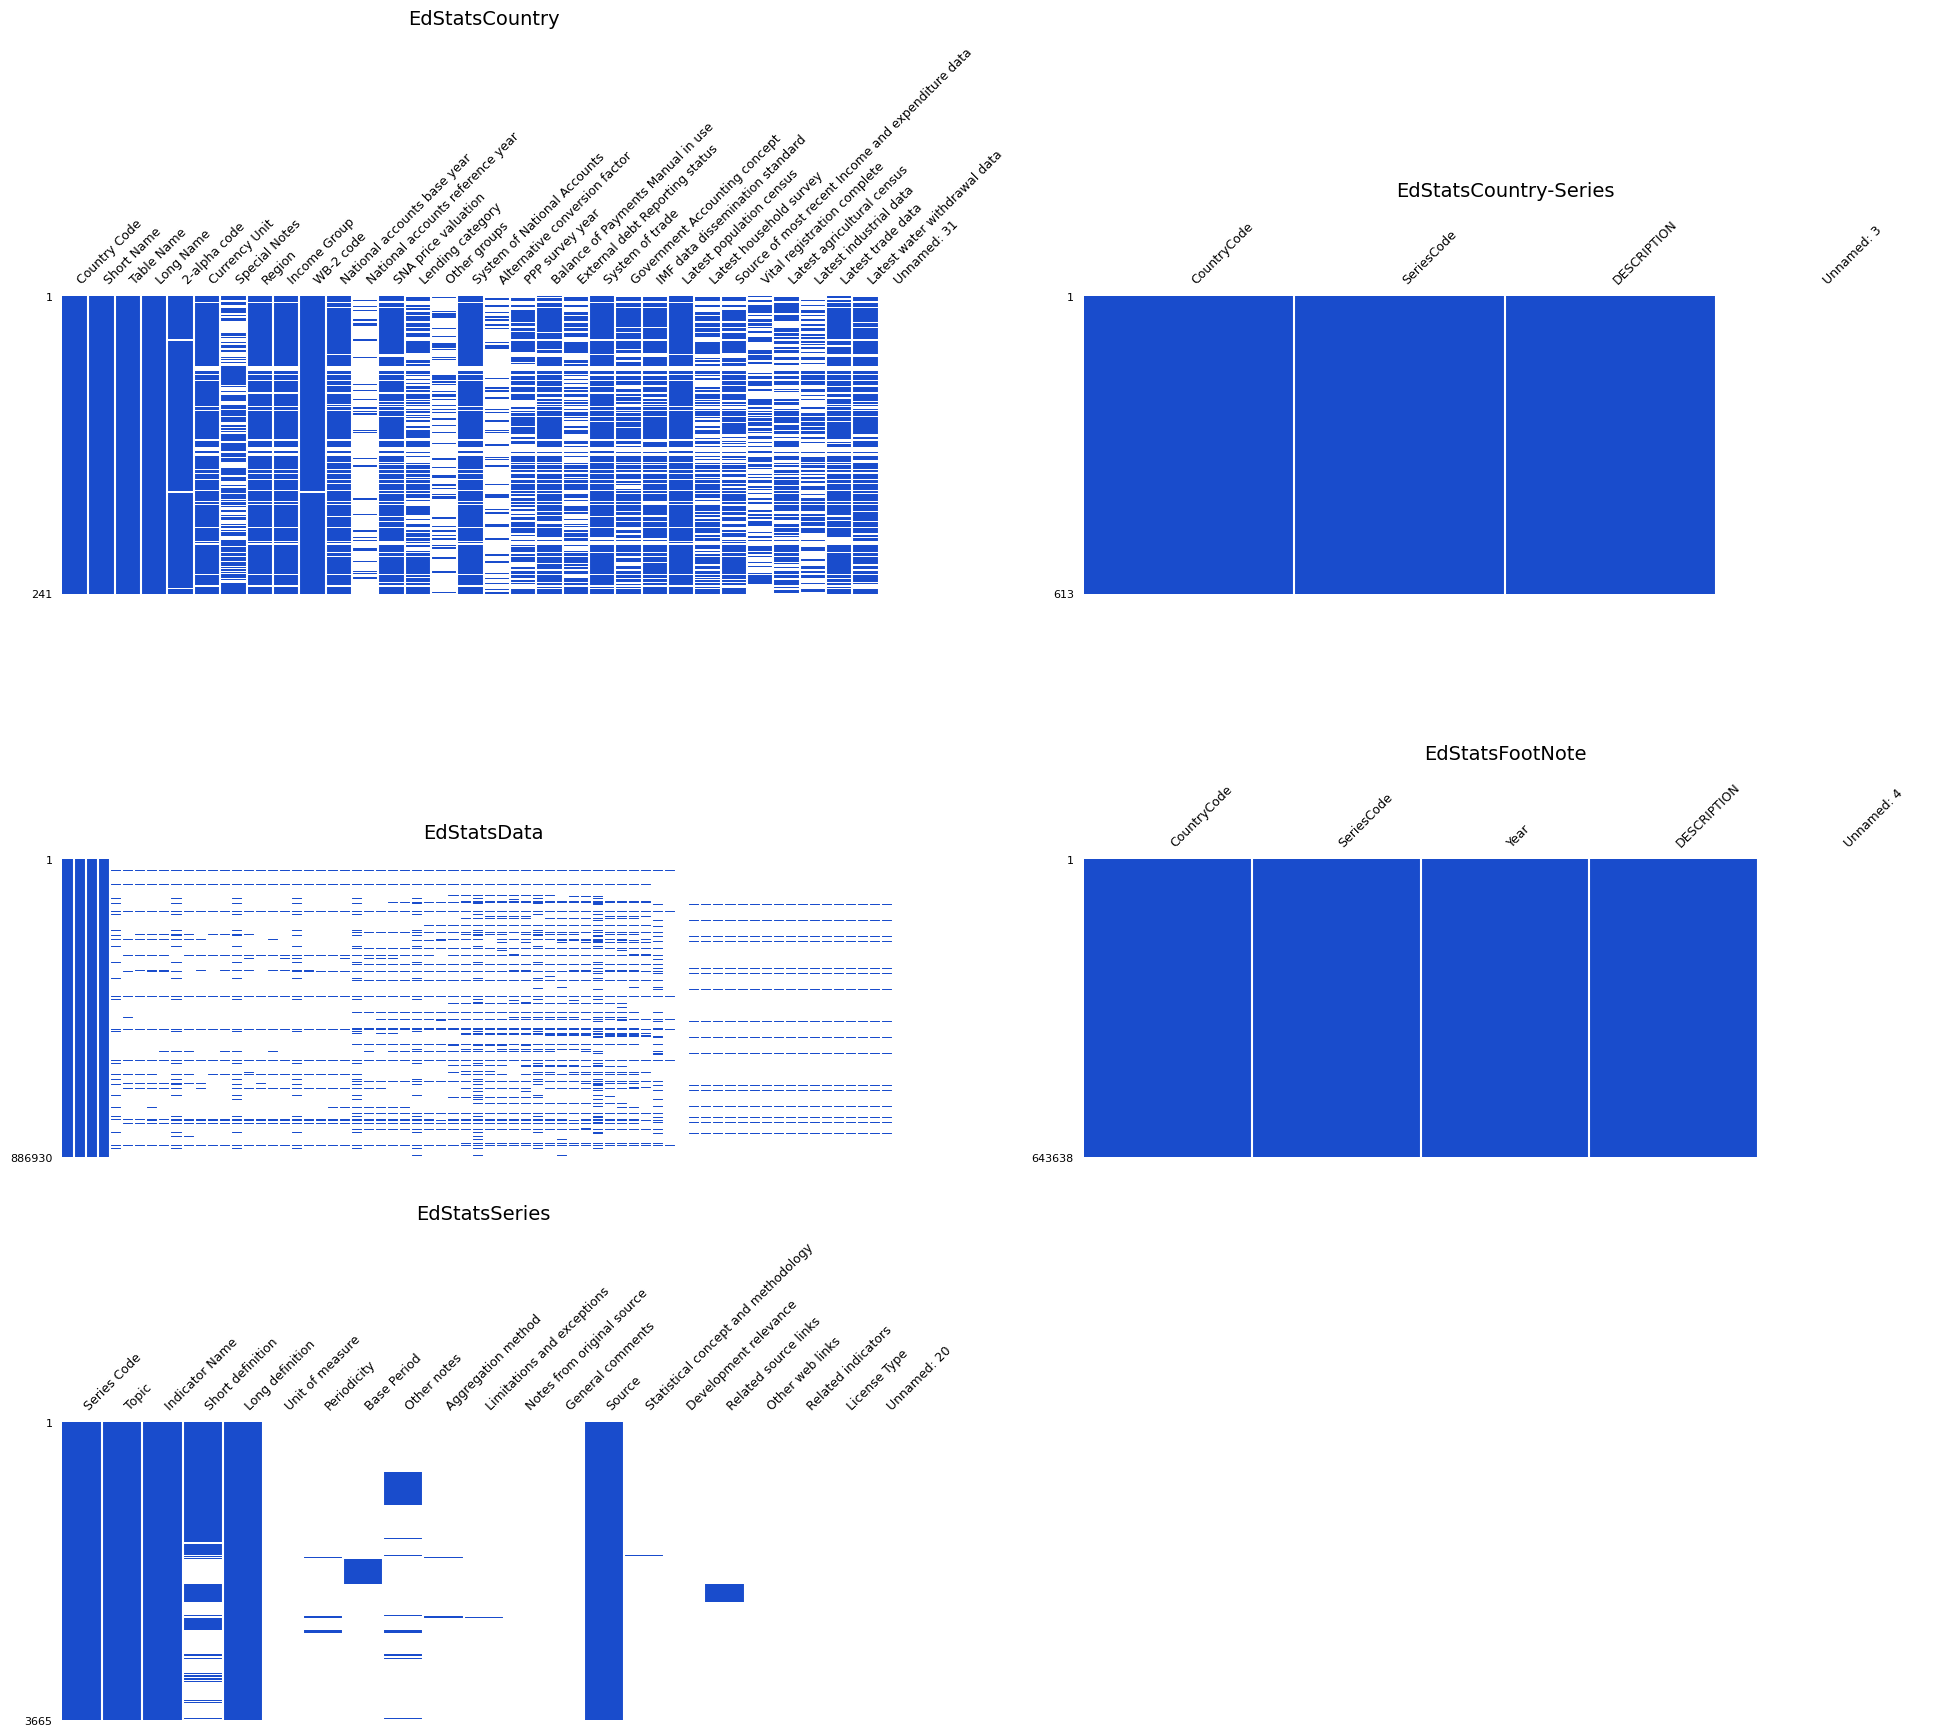

In [8]:
bsinfo.visualize_missingness()

### **Missing Data Interpretation**

* **Blue cells** = data available (non-missing)
* **White cells** = data missing

---

* **EdStatsCountry (top-left):** Mostly complete — strong coverage across key fields. However, variables like *National Accounts Reference Year* and *Lending Category* show large white gaps, signaling limited completeness.
* **EdStatsCountry-Series (top-right):** Nearly fully blue — excellent completeness — aside from the *Unnamed: 3* column, which is entirely empty.
* **EdStatsData (middle-left):** Noticeable missingness across time, especially in early and recent years. Data density improves significantly between **1995–2015**, which appears to be the most reliable range.
* **EdStatsFootNote (middle-right):** Almost entirely complete except for one unused *Unnamed* column.
* **EdStatsSeries (bottom):** Core metadata (e.g., *Series Code, Indicator Name*) is well populated, but many contextual fields (*Unit of Measure, Periodicity, Notes*) are largely missing.

---

**Action:**
Columns with **over 70% missing values** will be dropped to maintain analytical reliability. Beyond this threshold, imputation would introduce **artificial or unreliable information**.

In [9]:
skip_list = np.arange(1970,2101).astype(str) # Keeping the years for further analysis 
bsinfo.dropabove(skip_cols=skip_list,missing_threshold = 70) ## saving the process files at this stage to files 

### --- Missingness -------- 0 - EdStatsCountry --------------

### --- Missingness -------- 1 - EdStatsCountry-Series --------------

### --- Missingness -------- 2 - EdStatsData --------------

### --- Missingness -------- 3 - EdStatsFootNote --------------

### --- Missingness -------- 4 - EdStatsSeries --------------

 Dropped 4 columns from **EdStatsCountry** (>70% missing): ['National accounts reference year', 'Other groups', 'Alternative conversion factor', 'Unnamed: 31']

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/interim/EdStatsCountry.csv


 Dropped 1 columns from **EdStatsCountry-Series** (>70% missing): ['Unnamed: 3']

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/interim/EdStatsCountry-Series.csv


 Dropped 1 columns from **EdStatsData** (>70% missing): ['Unnamed: 69']

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/interim/EdStatsData.csv


 Dropped 1 columns from **EdStatsFootNote** (>70% missing): ['Unnamed: 4']

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/interim/EdStatsFootNote.csv


 Dropped 15 columns from **EdStatsSeries** (>70% missing): ['Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/interim/EdStatsSeries.csv


## The modality: The various categorical variables in the data 

In [10]:
bsinfo.modality()

'---------EdStatsCountry---------------'

Nunique Features
Country Code                                                    241
Short Name                                                      241
Table Name                                                      241
Long Name                                                       241
2-alpha code                                                    238
Currency Unit                                                   152
Special Notes                                                   131
Region                                                            7
Income Group                                                      5
WB-2 code                                                       240
National accounts base year                                      43
SNA price valuation                                               2
Lending category                                                  3
System of National Accounts                                       3
PPP survey year                                                   3
Balance of Payments Manual in use                                 1
External debt Reporting status                                    3
System of trade                                                   2
Government Accounting concept                                     2
IMF data dissemination standard                                   2
Latest population census                                         27
Latest household survey                                          60
Source of most recent Income and expenditure data                75
Vital registration complete                                       2
Latest agricultural census                                       35
Latest water withdrawal data                                     20

'---------EdStatsCountry-Series---------------'

Nunique Features
CountryCode               211
SeriesCode                 21
DESCRIPTION                97

'---------EdStatsData---------------'

Nunique Features
Country Name                 242
Country Code                 242
Indicator Name              3665
Indicator Code              3665
2017                           4

'---------EdStatsFootNote---------------'

Nunique Features
CountryCode               239
SeriesCode               1558
Year                       56
DESCRIPTION              9102

'---------EdStatsSeries---------------'

Nunique Features
Series Code                   3665
Topic                           37
Indicator Name                3665
Short definition              1169
Long definition               2060
Source                          31

### **Dataset Summary – EdStatsCountry**

* **Identifiers (11):** Core country descriptors such as *Country Code, Short/Long/Table Name, Currency Unit,* and survey reference fields (e.g., *Household Survey, Base Year*).
* **Categorical (14):** Contextual and classification variables, including *Region, Income Group, Lending Category, System of Trade,* and *Population or Agricultural Census years*.

---

### **Dataset Summary – EdStatsCountry-Series**

* **Identifiers:** *CountryCode* and *DESCRIPTION*
* **Categorical:** *SeriesCode* — links each indicator to its corresponding country.

---

### **Dataset Summary – EdStatsData**

* **Identifiers:** *Country Name, Country Code, Indicator Name, Indicator Code* — uniquely define each observation.
* **Categorical:** None — this dataset mainly contains numeric indicator values over time.

---

### **Dataset Summary – EdStatsFootNote**

* **Identifiers:** *CountryCode, SeriesCode, DESCRIPTION* — provide clear linkage and context.
* **Categorical:** *Year* — defines the time reference for each note.

---

### **Dataset Summary – EdStatsSeries**

* **Identifiers:** *Series Code, Indicator Name, Short Definition, Long Definition* — describe each indicator.
* **Categorical:** *Topic* and *Source* — organize indicators by theme and origin.

## The classification of the categorical variables into modality;

In [11]:
conf.pdconfig(nrows=10,cols_width=10)
bsinfo.modalclassification()

Pandas config display options set.

EdStatsCountry      Country Code Short Name Table Name  Long Name 2-alpha code Currency Unit Special Notes     Region Income Group WB-2 code National accounts base year SNA price valuation Lending category System of National Accounts PPP survey year Balance of Payments Manual in use External debt Reporting status System of trade Government Accounting concept IMF data dissemination standard Latest population census Latest household survey Source of most recent Income and expenditure data Vital registration complete Latest agricultural census  Latest industrial data  Latest trade data Latest water withdrawal data
0          ABW        Aruba      Aruba      Aruba         AW    Aruban...     SNA da...     Latin ...  High i...          AW       2000                   Value ...                 NaN        Countr...                         NaN       IMF Ba...                               NaN                      Specia...             NaN                           NaN                          

### **Classifying Variables by Uniqueness**

This step examines the **cardinality** (number of unique values) of categorical variables to understand their **analytical relevance**.
By grouping them into intervals (2–10, 11–20, 21–30, 31–40), we can:

* **Assess variable diversity:** Identify which features have few unique values (e.g., *Region*, *Income Group*) versus those that are highly unique (e.g., *Country Name*, *Indicator Code*).
* **Support feature selection:**

  * Low-cardinality variables are suitable for **grouping, segmentation, or aggregation**.
  * High-cardinality variables often act as **identifiers or metadata**, not analytical predictors.
* **Simplify data exploration:** Helps focus visualizations and variables that vary meaningfully across countries.

### Frequency Distribution Table (with absolute, relative, and cumulative frequencies)

In [12]:
conf.pdconfig(nrows=None,cols_width=40)
bsinfo.prodata

Pandas config display options set.

{'EdStatsCountry': [(2,
   10,
   [                       Region   n     f     F
    0       Europe & Central Asia  57  0.27  0.27
    1          Sub-Saharan Africa  48  0.22  0.49
    2   Latin America & Caribbean  41  0.19  0.68
    3         East Asia & Pacific  36  0.17  0.85
    4  Middle East & North Africa  21  0.10  0.95
    5                  South Asia   8  0.04  0.99
    6               North America   3  0.01  1.00,
               Income Group   n     f     F
    0   Upper middle income  55  0.26  0.26
    1   Lower middle income  50  0.23  0.49
    2  High income: nonOECD  44  0.21  0.70
    3            Low income  34  0.16  0.86
    4     High income: OECD  31  0.14  1.00,
                        SNA price valuation    n     f     F
    0     Value added at basic prices (VAB)  163  0.83  0.83
    1  Value added at producer prices (VAP)   34  0.17  1.00,
      Lending category   n     f     F
    0             IBRD  67  0.47  0.47
    1              IDA  59  0.41  0.88
  

### Frequency Distribution Graph 


### Dataset: EdStatsCountry


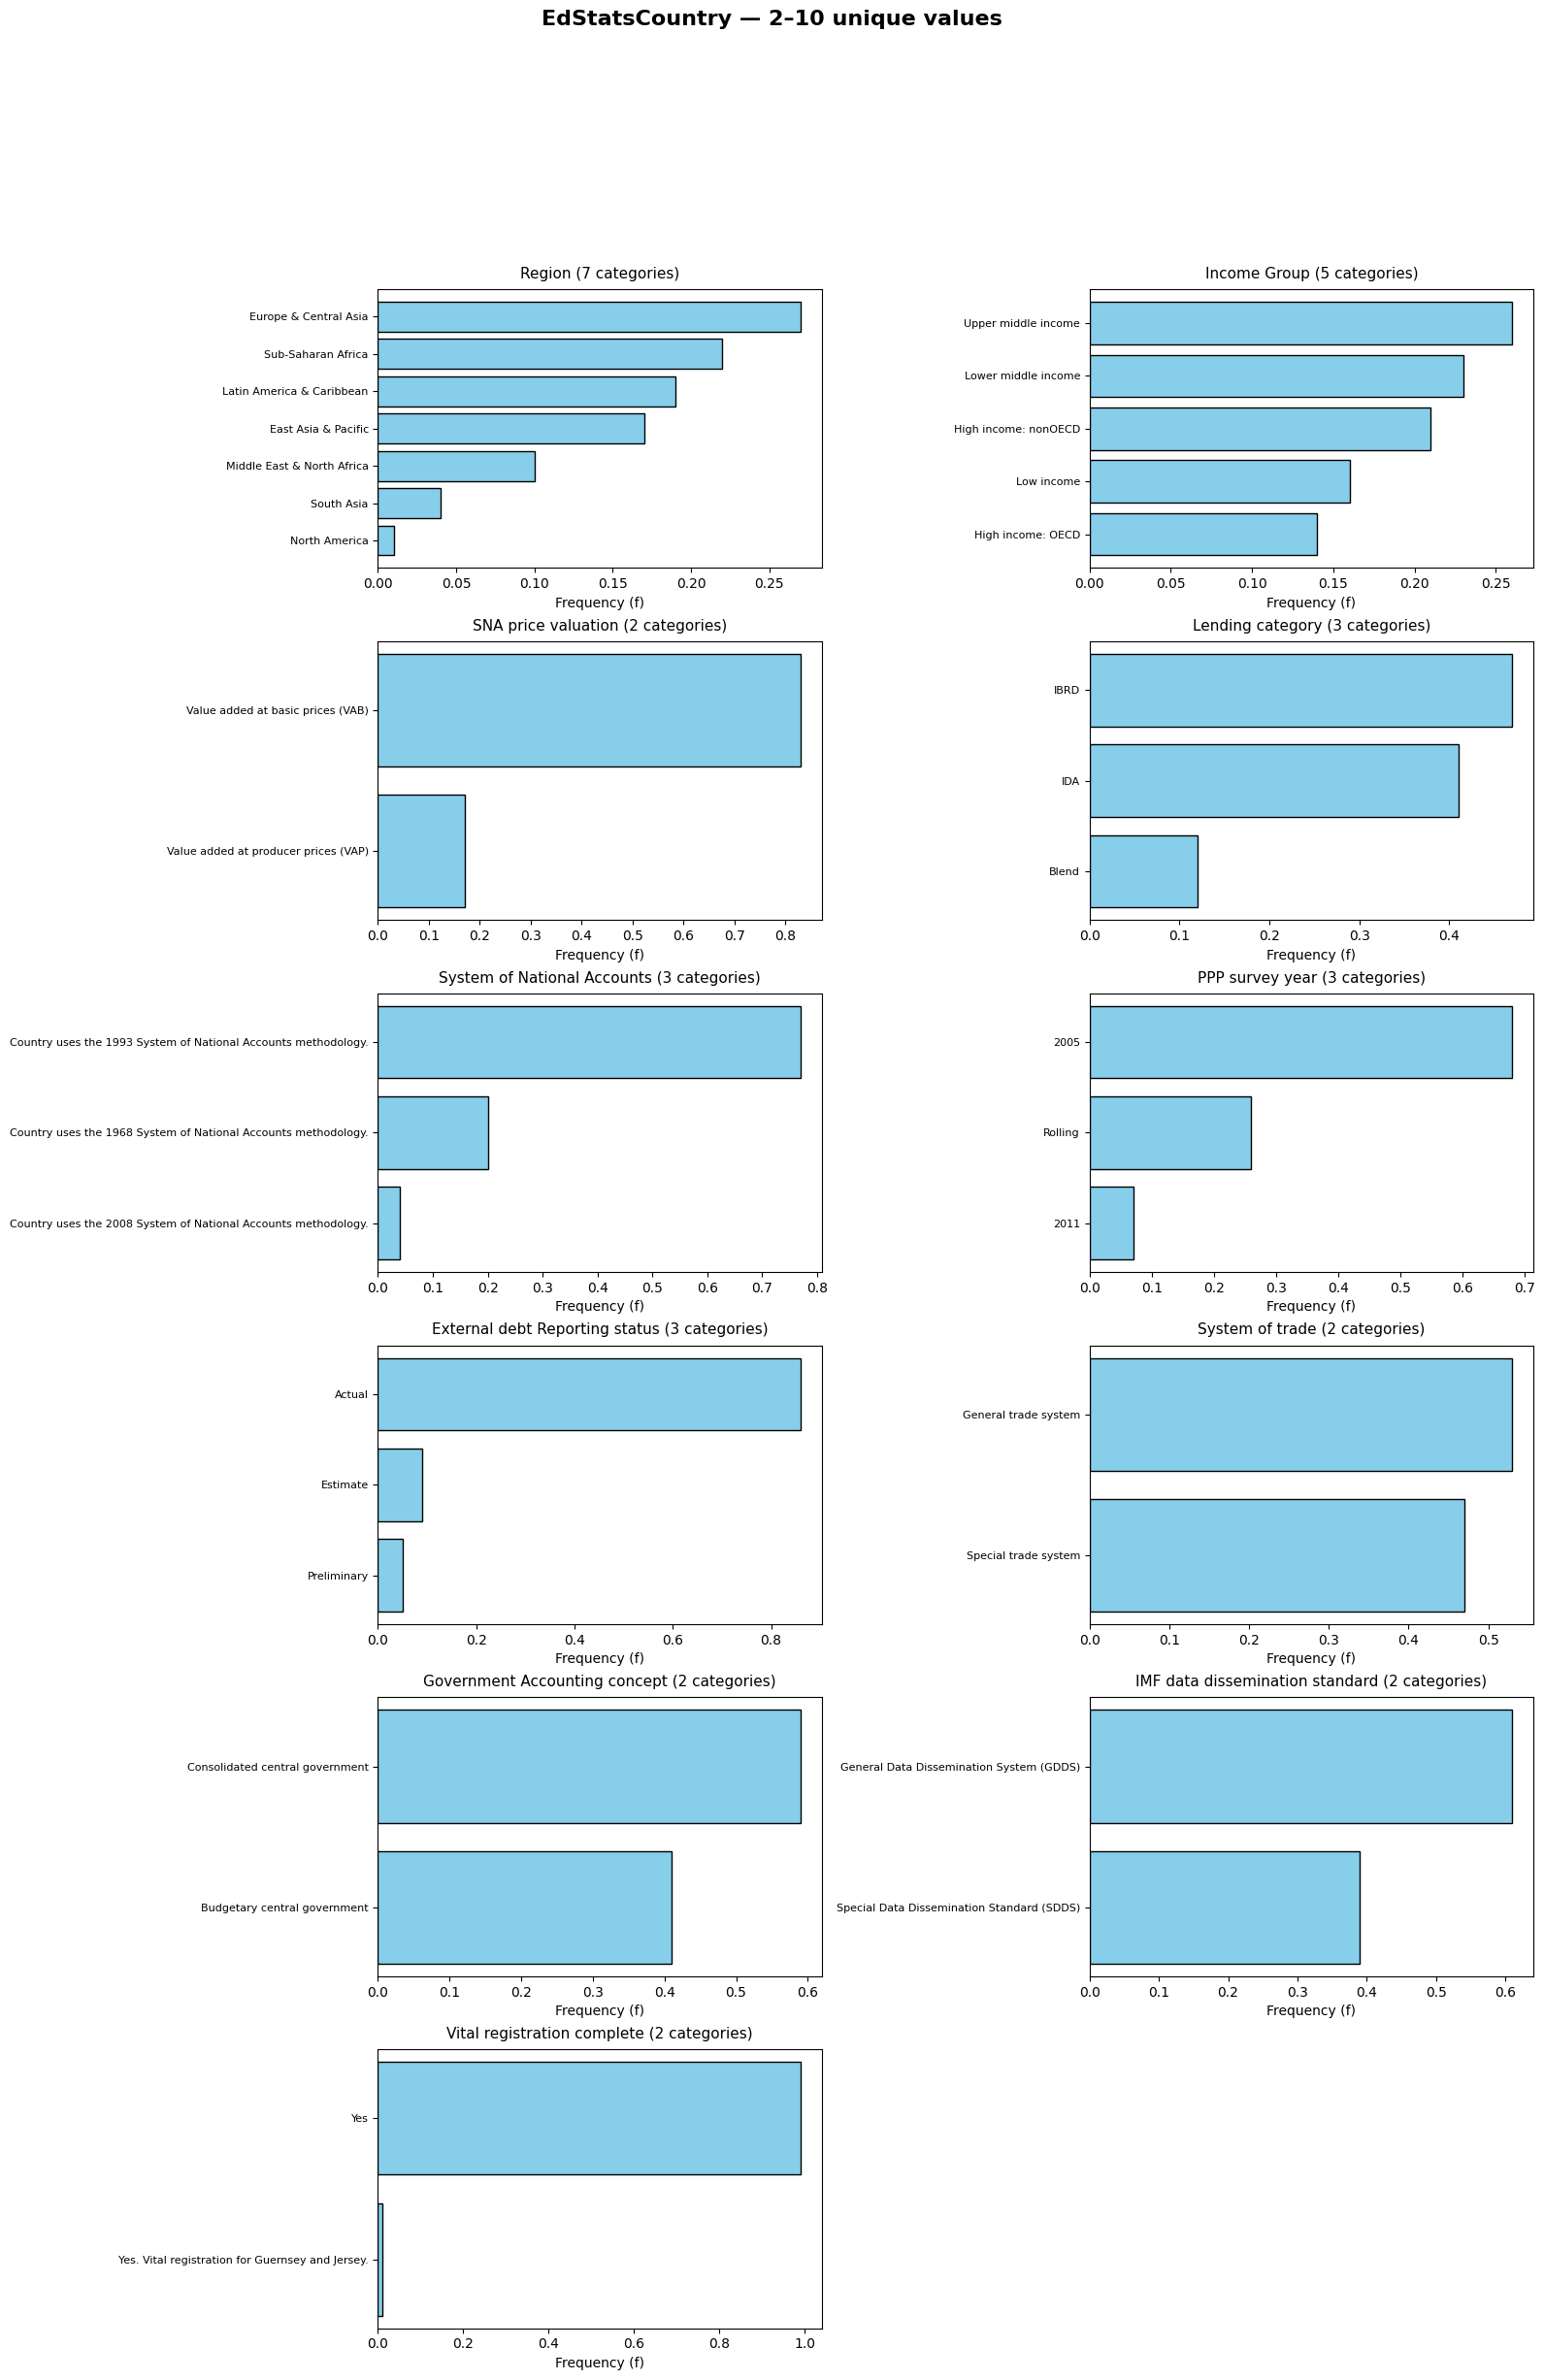

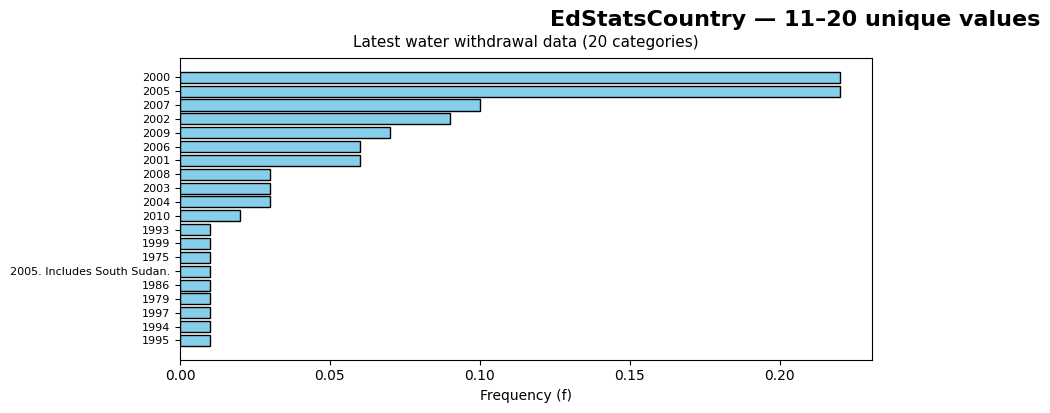

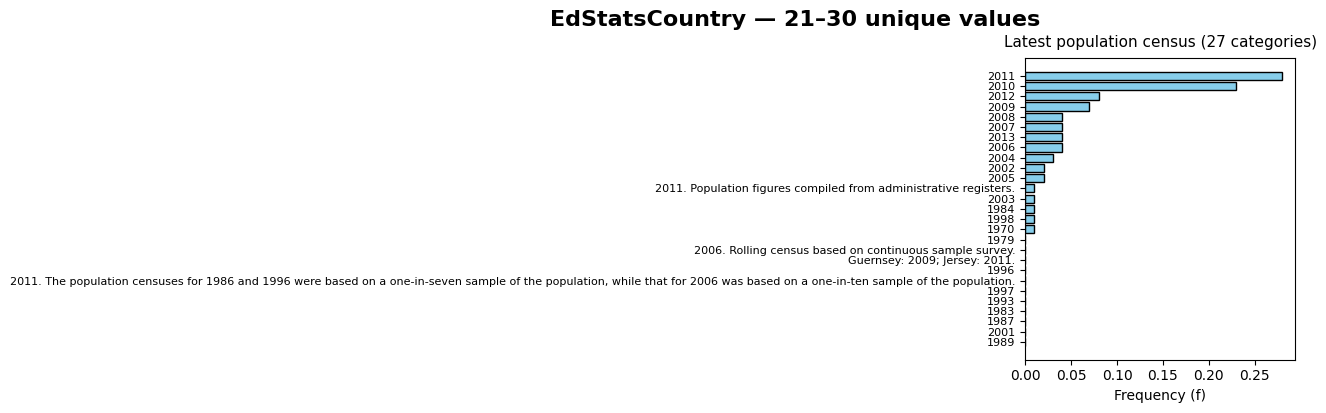

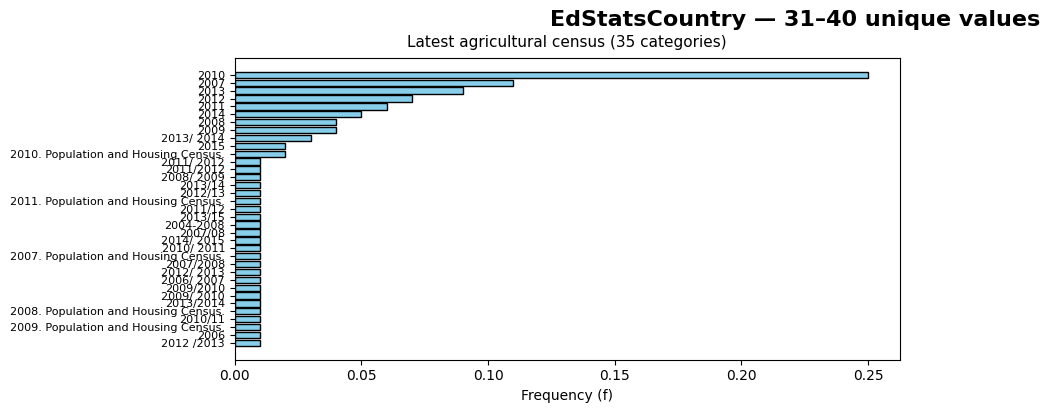


### Dataset: EdStatsCountry-Series


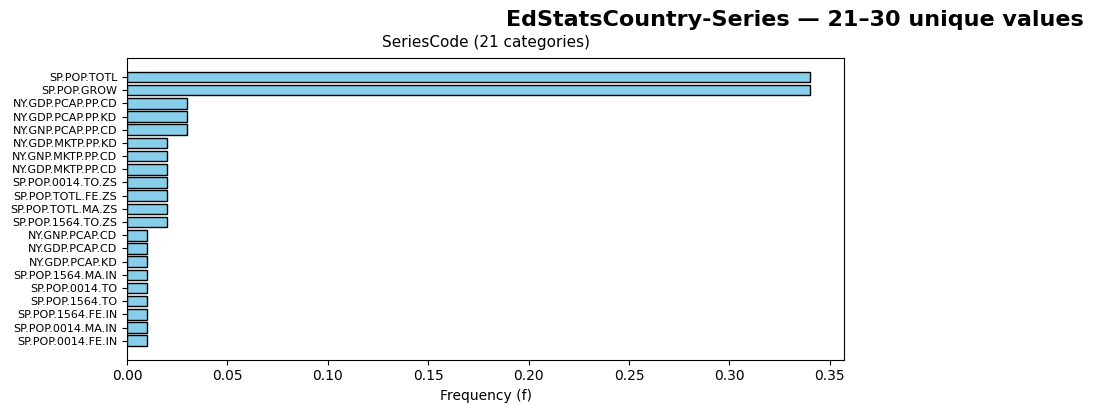


### Dataset: EdStatsData


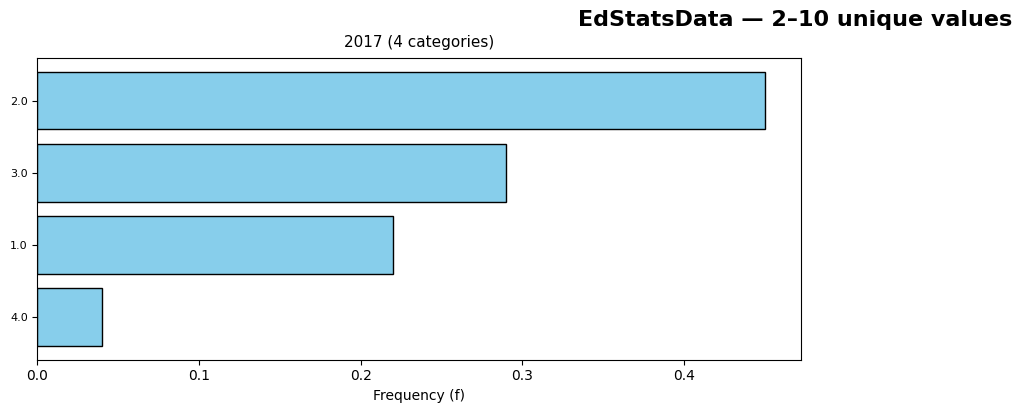


### Dataset: EdStatsFootNote

### Dataset: EdStatsSeries


/Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/src/project2/utils/DataInspector.py:360: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


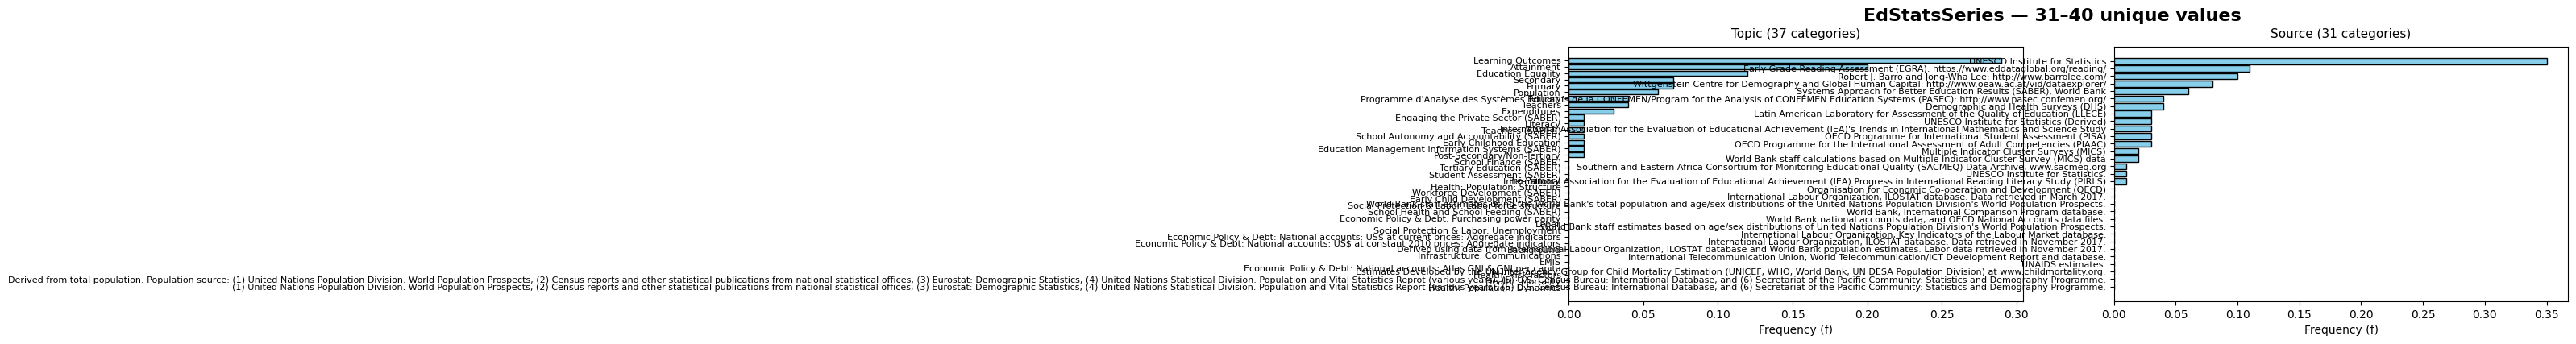

In [13]:
bsinfo.dataTable()

## **Summary of Surface Exploration**

### **EdStatsCountry — 2–10 Unique Values**

The data shows clear **regional and economic segmentation** across countries.
**Region** and **Income Group** are well-balanced, capturing global diversity, while most nations follow **standardized macroeconomic frameworks** such as the *1993 System of National Accounts* and *Value Added at Basic Prices (VAB)*.
Limited variation in **Government Accounting**, **IMF Data Standards**, and **Vital Registration** suggests **institutional consistency** with few outliers.

---

### **EdStatsCountry — Latest Water Withdrawal Data**

Most records cluster between **2000–2007**, reflecting a major global data collection period, with fewer updates afterward.
Earlier years show **significant data gaps**, especially among developing countries.

---

### **EdStatsCountry — Latest Agricultural Census**

The majority of countries report agricultural census years between **2008–2015**, peaking around **2010**, indicating a **coordinated global effort** in agricultural data collection.

---

### **EdStatsCountry-Series — SeriesCode Distribution**

The dataset is **dominated by population-related indicators** (*SP.POP.TOTL*, *SP.POP.GROW*), making up over two-thirds of all records.
Economic measures like *NY.GDP.PCAP.PP.CD* are less represented, showing a **demographic rather than economic focus**.


# Step 3 First Cleaning 

## Objective: 
- Remove fake counntries by observation
  - Load the previous processed files and use them here.

In [14]:
# Loading the semi processed data 
data_path = Path('../data/interim/*.csv')
# Modules 
file_names,data_diction = ld.load_raw_files_csv(data_path)

Filesnames
0         EdStatsCountry
1  EdStatsCountry-Series
2            EdStatsData
3        EdStatsFootNote
4          EdStatsSeries

### Loading the EdStatsCountry data for inspection

In [15]:
# EdStatsCountry
name = 'EdStatsCountry'
df = data_diction[name]

### Selecting features of interest 

In [16]:
df_columns = df[['Country Code','Short Name', 'Long Name']] # select features of interest 
conf.pdconfig(nrows=None,cols_width=None) # configuring the pandas to display to certain limit 
df_columns

Pandas config display options set.

Country Code                                      Short Name                                                                  Long Name
0            ABW                                           Aruba                                                                      Aruba
1            AFG                                     Afghanistan                                               Islamic State of Afghanistan
2            AGO                                          Angola                                                People's Republic of Angola
3            ALB                                         Albania                                                        Republic of Albania
4            AND                                         Andorra                                                    Principality of Andorra
5            ARB                                      Arab World                                                                 Arab World
6            ARE                            United Arab Emirates                                                       United Arab Emirates
7            ARG                                       Argentina                                                         Argentine Republic
8            ARM                                         Armenia                                                        Republic of Armenia
9            ASM                                  American Samoa                                                             American Samoa
10           ATG                             Antigua and Barbuda                                                        Antigua and Barbuda
11           AUS                                       Australia                                                  Commonwealth of Australia
12           AUT                                         Austria                                                        Republic of Austria
13           AZE                                      Azerbaijan                                                     Republic of Azerbaijan
14           BDI                                         Burundi                                                        Republic of Burundi
15           BEL                                         Belgium                                                         Kingdom of Belgium
16           BEN                                           Benin                                                          Republic of Benin
17           BFA                                    Burkina Faso                                                               Burkina Faso
18           BGD                                      Bangladesh                                            People's Republic of Bangladesh
19           BGR                                        Bulgaria                                                       Republic of Bulgaria
20           BHR                                         Bahrain                                                         Kingdom of Bahrain
21           BHS                                     The Bahamas                                                Commonwealth of The Bahamas
22           BIH                          Bosnia and Herzegovina                                                     Bosnia and Herzegovina
23           BLR                                         Belarus                                                        Republic of Belarus
24           BLZ                                          Belize                                                                     Belize
25           BMU                                         Bermuda                                                               The Bermudas
26           BOL                                         Bolivia                                             Plurinational State of Bolivia
27           BRA                                          Brazil                    

### Invalid Countries List- the invalid countries selected 

In [17]:
codes_list = [
 'ARB', 'CHI', 'EAP', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU',
 'HIC', 'HPC', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY',
 'MEA', 'MIC', 'MNA', 'NAC', 'OED', 'SAS', 'SSA', 'SSF',
 'UMC', 'WLD', 'XKX'
]

### Results here cross checked with the output from **Pycountry library**

### **Comments**

- The code_lists codes (**codes_list**) correspond to **aggregate regions, income classifications, or organizational groupings**, not to individual sovereign countries:
  
    - Examples include **regional aggregates** (e.g., **EAP** – East Asia & Pacific, **SSA** – Sub-Saharan Africa), **income categories** (e.g., **LIC**, **UMC**, **HIC**), and **institutional groupings** (e.g., **OED** – OECD members, **EMU** – Euro area, **WLD** – World).
  
    - Including these in country-level analyses would **distort results**, as they represent **aggregated or overlapping data**, often calculated as weighted averages across member countries.

Therefore, these entries should be **excluded** when performing **country-specific modeling, comparisons, or geographic analyses**, ensuring that the dataset reflects only **sovereign nations or territories** with independent observations.


## Filtering the dataset with the above invalid codes 

In [18]:
mask = df["Country Code"].isin(codes_list)
df_Invalid_Code = df[mask]

df_Invalid_Country = df_Invalid_Code[["Country Code", "Short Name"]].reset_index(drop=True)
df_Invalid_Country = df_Invalid_Country.rename(columns={"Country Code": 'Invalid Code'})

df_show = HTML(df_Invalid_Country.to_html(max_rows=None, max_cols=None))
display(df_show)

### **Workflow – Identifying and Handling Invalid Country Codes**

* **Define invalid codes:**
 -  Create a list (**codes_list**) of non-country identifiers such as regional aggregates, income groups, and organizations.

* **Filter invalid entries:**
 - Use **isin()** to extract rows where **"Country Code"** matches values in **codes_list**.

* **Select key columns:**
 - Keep only **"Country Code"** and **"Short Name"** for clear review of invalid records.

* **Reset index:**
  - Apply **.reset_index(drop=True)** for cleaner table formatting.


## Sorting other Counries Consistent with the EdStatsCountry Non-Country List 
- using the invalid list to filter all the datasets by looping over all the files 

In [19]:
for name, df in data_diction.items():

    cols = df.columns.tolist()

    for col in cols:
        if col in ['CountryCode', 'Country Code']:
            colname = col 
    
    if colname in df.columns: 
        df_wrong = df[colname].isin(codes_list)
    
    display(Markdown(f"Nomber of Invalid Count {name}: \
                        {df_wrong.sum()}"))
        
    # Fillter out wrong country 
    df_cleaned = df[~df_wrong]
    #save the processed files to a folder 
    saver.save_process_files(name,df_cleaned,filetype='csv',path='processed')

Nomber of Invalid Count EdStatsCountry:                         27

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/processed/EdStatsCountry.csv


Nomber of Invalid Count EdStatsCountry-Series:                         14

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/processed/EdStatsCountry-Series.csv


Nomber of Invalid Count EdStatsData:                         98955

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/processed/EdStatsData.csv


Nomber of Invalid Count EdStatsFootNote:                         125234

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/processed/EdStatsFootNote.csv


Nomber of Invalid Count EdStatsSeries:                         125234

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/processed/EdStatsSeries.csv


/var/folders/t4/hfbjf1bn5vvdpct8shsxy9000000gn/T/ipykernel_83228/1234340537.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df[~df_wrong]


### **Workflow – Detecting and Removing Invalid Country Codes Across Multiple Datasets**

* **Iterate through datasets:**

  * Loop through each DataFrame in the dictionary **data_diction** 


* **Identify country code column:**

  * Check column names and detect whether the dataset uses **"CountryCode"** or **"Country Code"**.
  * Store the correct column name in **colname**.


* **Check for invalid entries:**

  * Use **isin(codes_list)** to flag rows containing invalid country codes (regional aggregates or groups).



* **Filter out invalid records:**

  * Remove rows where the country code matches any value in **codes_list**, keeping only valid countries.



* **Save cleaned datasets:**

  * Export each cleaned DataFrame to a **“processed”** folder using **saver.save_process_files()**, ensuring consistent storage and naming.

# Approach 2 to eliminate the invalid countries 

- Instead of observing line by line; 
  - Use Python pycountry python library 
  
  import pycountry # Importing pycountry module 

- from the country select alpha_3 which corresponds to ISO3( The country codes)
- List of valid countries (code)
Ref_country_code = [country.alpha_3.upper() for country \
                       in pycountry.countries]  


- The list is used to filter the Country Code of all the data set once or 
- filter the Country level data and determine the invalid code apply that to the remaining files. 

#### Demonstration 
- using ISO3 from the pycountry as the Reference country 

In [20]:
# EdStatsCountry
name = 'EdStatsCountry'
df = data_diction[name]
cln = Cleaner(name,df)

### Displaying the Invalid Countries 

In [21]:
cln.fk_country(name,df, return_code=False, disp=True)

For EdStatsCountry - 27: number of invalid countries are sorted out


- Using the Above Invalid Countries one can filter all the all the data set automatically. 
- One get the same number of invalid countries as in the case of the manual observation

### Advantages of Approach 2

* **Automation**: Eliminates the need for manual inspection of country codes.
* **Scalability**: Works across multiple datasets with minimal code changes.
* **Accuracy**: Leverages standardized ISO-3 codes to minimize ambiguity.
* **Reusability**: Once invalid codes are detected, they can be applied across all datasets.
* **Transparency**: Invalid codes can be displayed or logged for audit purposes.



## Ex2
### Global Objectives
---
 - To reduce the scope of the dataset by focussing on the relevant indicators. 
    - to simplify the process of selecting relevant indicators and ensure alignment with Mark’s analytical requirements.

### Load all preprocessed cvs

In [22]:
# Loading the semi processed data from the part 1  
data_path = Path('../data/processed/*.csv')
## Files per dataframe 
file_names,data_diction = ld.load_raw_files_csv(data_path)

Filesnames
0         EdStatsCountry
1  EdStatsCountry-Series
2            EdStatsData
3        EdStatsFootNote
4          EdStatsSeries

## Step 1: Reduce the Scope Using Data Driven Approach 

- Inspecting Indictor linked dataframe for Business Categories
- EdStatsSeries has the definition of the business categories 

### Creaing dataframe for the respective datasets for easy identification and handling

In [23]:
df_EdStatsSeries    = data_diction['EdStatsSeries']
df_EdStatsCountry   = data_diction['EdStatsCountry']
df_EdStatsCountry_Series = data_diction['EdStatsCountry-Series']
df_EdStatsData = data_diction['EdStatsData']
df_EdStatsFootNote = data_diction['EdStatsFootNote']

#### Defining original number of the lignes in each datasets before cleaning
- This is for verification if the files are successfully cleaned or not 

In [24]:
## Oringal number of rows: to check comparison 
Or_EdStatsSeries_rows = df_EdStatsSeries.shape[0]
Or_EdStatsCountry_rows = df_EdStatsCountry.shape[0]
Or_EdStatsCountry_Series_rows = df_EdStatsCountry_Series.shape[0]
Or_EdStatsFootNote_rows = df_EdStatsFootNote.shape[0]
Or_EdStatsData_rows = df_EdStatsData.shape[0]

#### The Business Category from EdStatsSeries: 
- To filter educational related category
    - What are these categories: the modality 

In [25]:
conf.pdconfig(nrows=5,cols_width=None)
display(df_EdStatsSeries.head(5))

Pandas config display options set.

Series Code       Topic                                                          Indicator Name                                             Short definition                                              Long definition                                                      Source
0  BAR.NOED.1519.FE.ZS  Attainment  Barro-Lee: Percentage of female population age 15-19 with no education  Percentage of female population age 15-19 with no education  Percentage of female population age 15-19 with no education  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/
1     BAR.NOED.1519.ZS  Attainment         Barro-Lee: Percentage of population age 15-19 with no education         Percentage of population age 15-19 with no education         Percentage of population age 15-19 with no education  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/
2  BAR.NOED.15UP.FE.ZS  Attainment    Barro-Lee: Percentage of female population age 15+ with no education    Percentage of female population age 15+ with no education    Percentage of female population age 15+ with no education  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/
3     BAR.NOED.15UP.ZS  Attainment           Barro-Lee: Percentage of population age 15+ with no education           Percentage of population age 15+ with no education           Percentage of population age 15+ with no education  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/
4  BAR.NOED.2024.FE.ZS  Attainment  Barro-Lee: Percentage of female population age 20-24 with no education  Percentage of female population age 20-24 with no education  Percentage of female population age 20-24 with no education  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/

#### The modality of the business categories 

In [26]:

print("------The modality----------")
display(df_EdStatsSeries['Topic'].unique().tolist())

print("------The cardinality----------")
display(f"The cardinality {df_EdStatsSeries['Topic'].nunique()}")

------The modality----------


['Attainment',
 'Education Equality',
 'Infrastructure: Communications',
 'Learning Outcomes',
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
 'Economic Policy & Debt: Purchasing power parity',
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
 'Teachers',
 'Education Management Information Systems (SABER)',
 'Early Child Development (SABER)',
 'Engaging the Private Sector (SABER)',
 'School Health and School Feeding (SABER)',
 'School Autonomy and Accountability (SABER)',
 'School Finance (SABER)',
 'Student Assessment (SABER)',
 'Teachers (SABER)',
 'Tertiary Education (SABER)',
 'Workforce Development (SABER)',
 'Literacy',
 'Background',
 'Primary',
 'Secondary',
 'Tertiary',
 'Early Childhood Education',
 'Pre-Primary',
 'Expenditures',
 'Health: Risk factors',
 'Health: Mortality',
 'Social Protection & Labor: Labor f

------The cardinality----------


'The cardinality 37'

## What is the value counts of each of the categorical data?

In [27]:
conf.pdconfig(nrows=None)
value_counts = (
    pd.DataFrame({
        "Modal": df_EdStatsSeries['Topic'].value_counts().index,
        "n": df_EdStatsSeries['Topic'].value_counts().values,
        "f": df_EdStatsSeries['Topic'].value_counts().values
    })
)

display(value_counts)

Pandas config display options set.

Modal     n     f
0                                                                              Learning Outcomes  1046  1046
1                                                                                     Attainment   733   733
2                                                                             Education Equality   426   426
3                                                                                      Secondary   256   256
4                                                                                        Primary   248   248
5                                                                                     Population   213   213
6                                                                                       Tertiary   158   158
7                                                                                       Teachers   137   137
8                                                                                   Expenditures    93    93
9                                                            Engaging the Private Sector (SABER)    51    51
10                                                                                      Literacy    32    32
11                                                                              Teachers (SABER)    29    29
12                                                    School Autonomy and Accountability (SABER)    29    29
13                                                                     Early Childhood Education    24    24
14                                              Education Management Information Systems (SABER)    23    23
15                                                                   Post-Secondary/Non-Tertiary    19    19
16                                                                        School Finance (SABER)    18    18
17                                                                    Tertiary Education (SABER)    17    17
18                                                                    Student Assessment (SABER)    15    15
19                                                                                   Pre-Primary    14    14
20                                                                 Health: Population: Structure    13    13
21                                                                 Workforce Development (SABER)    12    12
22                                                               Early Child Development (SABER)    12    12
23                                              Social Protection & Labor: Labor force structure    11    11
24                                                      School Health and School Feeding (SABER)     9     9
25                                               Economic Policy & Debt: Purchasing power parity     6     6
26                                                                                         Laber     3     3
27                                                       Social Protection & Labor: Unemployment     3     3
28        Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators     3     3
29  Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators     2     2
30                                                                                    Background     2     2
31                                                                Infrastructure: Communications     2     2
32                                                                                          EMIS     2     2
33                         Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita     1     1
34                                                                          Health: Risk factors     1     1
35                                                                             Health: Mortality     1     1
36                                                        

### **Comment on Topic Distribution**

- Most of the data focuses on **learning outcomes**, **attainment**, and **education equality**, with good coverage of **secondary**, **primary**, and **tertiary** education.

- This fits well with Academy’s strategy, as it provides useful insights into **student performance**, **education quality**, and **system structure**. .

## Filter the non-relevant categories 

In [28]:
# The relevant categories 
irrelevant_topics = [
    'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
    'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
    'Economic Policy & Debt: Purchasing power parity',
    'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
    'Health: Risk factors',
    'Health: Mortality',
    'Health: Population: Structure',
    'Health: Population: Dynamics',
    'Social Protection & Labor: Labor force structure',
    'Social Protection & Labor: Unemployment',
    'Population',
    'Laber',   
    'Background',
    'Early Child Development (SABER)',          
    'Engaging the Private Sector (SABER)',       
    'School Health and School Feeding (SABER)',  
    'EMIS'                                      
]

# Filter out irrelevant topics 
mask_irrelevant = df_EdStatsSeries['Topic'].isin(irrelevant_topics)
df_EdStatsSeries = df_EdStatsSeries[~mask_irrelevant] # Only educational related info
display(df_EdStatsSeries['Topic'].unique()) # Cross checks

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes', 'Teachers',
       'Education Management Information Systems (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Primary',
       'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures', 'Post-Secondary/Non-Tertiary'],
      dtype=object)

## Display of the Educational related Indicator Counts (Top 10)

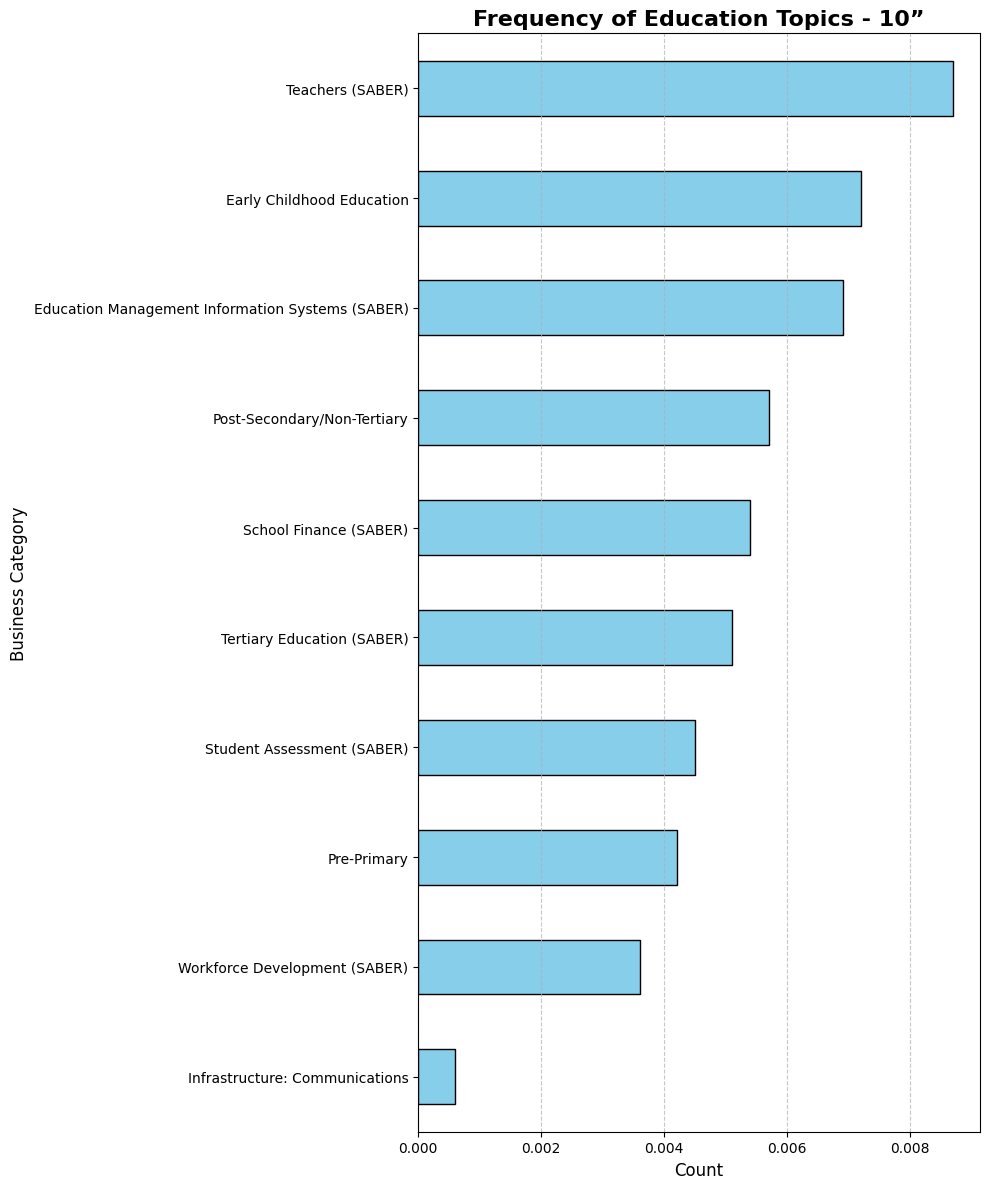

In [29]:
value_counts = (
    df_EdStatsSeries['Topic']
    .value_counts(normalize=True)
    .sort_values(ascending=True)  
).head(10)
# Plot
plt.figure(figsize=(10, 12))  # make it taller and wider
value_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Titles and labels
plt.title('Frequency of Education Topics - 10”', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Business Category', fontsize=12)

# Gridlines for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout to prevent label cutoff
plt.tight_layout()

plt.show()


Reasons for those selected Irrelevant Topics Exclusion
---------------------------
The following topics were excluded as they do not directly support Academy's goal 
of identifying countries with strong potential for online education expansion.

- **Economic Policy & Debt**: Focused on macroeconomic aggregates (e.g., GDP, GNI, PPP) 
  that do not reflect education access or learning engagement.

- **Health & Population**: Describe demographic or health outcomes rather than educational 
  participation, quality, or digital readiness. While population data may inform market size, 
  it does not indicate educational or technological readiness.

- **Labor & Social Protection**: Capture workforce and employment dynamics unrelated 
  to the target audience (high school and university-level learners).

- **Administrative SABER topics** (e.g., Early Child Development, School Health): 
  Address early-age or policy-level themes outside Academy’s core focus.

## The number of the Indicators after filtering with the Relevant Business Category

In [30]:
NIDB4F = Or_EdStatsSeries_rows # The number of indicators before filtering 
NIDAF = df_EdStatsSeries.shape[0] # The number of indicators after filtering 
display(f'The number of indictaors before: {NIDB4F } after filtering: {NIDAF}') 

diff_ind = (NIDB4F-NIDAF)/NIDB4F*100
display(f'The number of indicators dropped: {round(NIDB4F-NIDAF,3)}')
display(f'The pcnt% change: {round(diff_ind,3)}%')

'The number of indictaors before: 3665 after filtering: 3331'

'The number of indicators dropped: 334'

'The pcnt% change: 9.113%'

## Filtering all other datasets consistent with the edducation related indicators 

In [31]:
# Filtering the remaining EdStatsData
mask_relevant_EdStatsData = df_EdStatsData['Indicator Name'].isin(df_EdStatsSeries['Indicator Name'])
df_EdStatsData = df_EdStatsData[mask_relevant_EdStatsData]
display(f"The original rows: {Or_EdStatsData_rows}")
display(f"After cleaning: {df_EdStatsData.shape[0]}")
display(f"pcnt%: {round((Or_EdStatsData_rows - df_EdStatsData.shape[0])/Or_EdStatsData_rows,2)}%")


'The original rows: 787975'

'After cleaning: 634035'

'pcnt%: 0.2%'

In [32]:
# Filtering EdStatsFootNot
mask_relevant_EdStatFootNote = df_EdStatsFootNote['SeriesCode'].isin(df_EdStatsData['Indicator Code'])
df_EdStatsFootNote = df_EdStatsFootNote[mask_relevant_EdStatFootNote]
display(f"The original rows: {Or_EdStatsFootNote_rows}")
display(f"After cleaning: {df_EdStatsFootNote.shape[0]}")
display(f"pcnt%: {round((Or_EdStatsFootNote_rows - df_EdStatsFootNote.shape[0])/Or_EdStatsFootNote_rows,3)}%")

'The original rows: 518404'

'After cleaning: 482113'

'pcnt%: 0.07%'

In [33]:
# Filtering EdStatsCountry_Series
mask_relevant_EdStatsCountry_Series = df_EdStatsCountry_Series['CountryCode'].isin(df_EdStatsFootNote['CountryCode'])
df_EdStatsCountry_Series = df_EdStatsCountry_Series[mask_relevant_EdStatsCountry_Series]
display(f"The original rows: {Or_EdStatsCountry_Series_rows}")
display(f"After cleaning: {df_EdStatsCountry_Series.shape[0]}")
ff = (Or_EdStatsCountry_Series_rows - df_EdStatsCountry_Series.shape[0])/Or_EdStatsCountry_Series_rows
display(f"pcnt%: {round(ff,2)}")

'The original rows: 599'

'After cleaning: 593'

'pcnt%: 0.01'

In [34]:
mask_relevant_EdStatsCountry = df_EdStatsCountry['Country Code'].isin(df_EdStatsData['Country Code'])
df_EdStatsCountry = df_EdStatsCountry[mask_relevant_EdStatsCountry]

display(f"The original rows: {Or_EdStatsCountry_rows}")
display(f"After cleaning: {df_EdStatsCountry.shape[0]}")
display(f"pcnt%: {Or_EdStatsCountry_rows - df_EdStatsCountry.shape[0]}")


'The original rows: 214'

'After cleaning: 214'

'pcnt%: 0'

## Step 2
### Year analysis in EdSData File 

#### Focusing on the yearly data  from EdSData for data rich years.
 - Selecting year range for the data analysis 

In [35]:
display(df_EdStatsData.head())

Country Name Country Code                                                           Indicator Name  Indicator Code  1970  1971  1972  1973    1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992    1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006    2007  2008  2009  2010  2011  2012    2013    2014  2015  2016  2017  2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  2080  2085  2090  2095  2100
0  Afghanistan          AFG             Adjusted net enrolment rate, lower secondary, both sexes (%)      UIS.NERA.2   NaN   NaN   NaN   NaN   7.059   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  17.260   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  28.060   NaN   NaN   NaN   NaN   NaN  47.437  50.627   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
1  Afghanistan          AFG                 Adjusted net enrolment rate, lower secondary, female (%)    UIS.NERA.2.F   NaN   NaN   NaN   NaN   2.531   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   9.432   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  15.223   NaN   NaN   NaN   NaN   NaN  34.073  37.642   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2  Afghanistan          AFG  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)  UIS.NERA.2.GPI   NaN   NaN   NaN   NaN   0.222   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.386   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.379   NaN   NaN   NaN   NaN   NaN   0.567   0.598   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
3  Afghanistan          AFG                   Adjusted net enrolment rate, lower secondary, male (%)    UIS.NERA.2.M   NaN   NaN   NaN   NaN  11.427   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  24.420   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  40.153   NaN   NaN   NaN   NaN   NaN  60.087  62.907   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
4  Afghanistan          AFG                     Adjusted net enrolment rate, primary, both sexes (%)     SE.PRM.TENR   NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN     NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

#### Visualising Missing Indicator values trends in yearly columns EdStastData

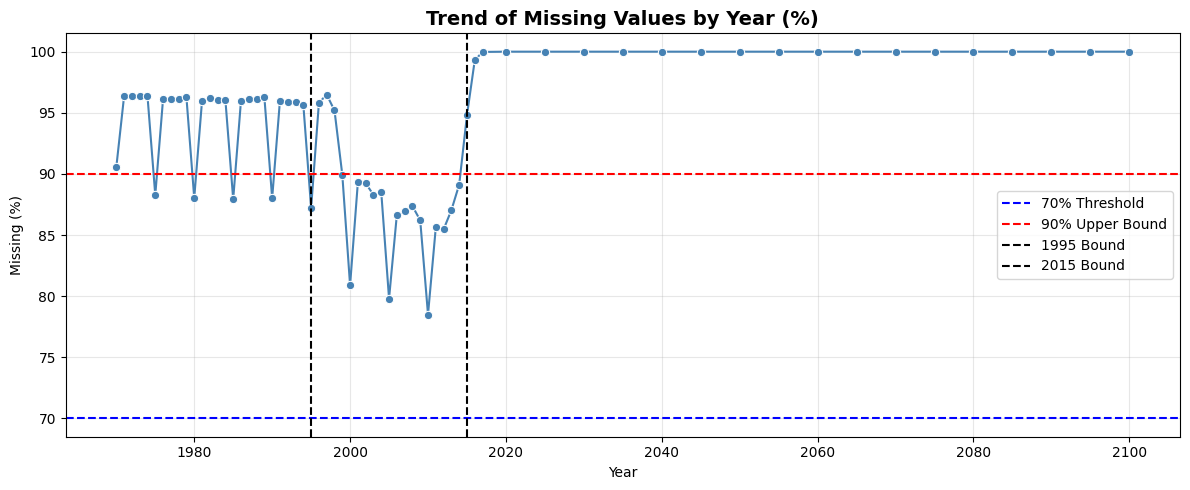

In [36]:
df_yrs = df_EdStatsData.select_dtypes(include='number') # sellecting the years 
missing = (
    df_yrs.isnull().mean()*100
).reset_index()
missing.columns = ['Year', 'Missing (%)']

## Check 
#print(missing)


# Convert year column to integer for proper sorting
missing['Year'] = missing['Year'].astype(int)

# Plot missingness trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=missing, x='Year', y='Missing (%)', marker='o', color='steelblue')


# Add styling
plt.title('Trend of Missing Values by Year (%)', fontsize=14, weight='bold')
plt.xlabel('Year')
plt.ylabel('Missing (%)')
plt.grid(alpha=0.3)
plt.axhline(70, color='blue', linestyle='--', label='70% Threshold')
plt.axhline(90, color='red', linestyle='--', label='90% Upper Bound')
plt.axvline(1995, color='black', linestyle='--', label='1995 Bound')
plt.axvline(2015, color='black', linestyle='--', label='2015 Bound')
plt.legend()
plt.tight_layout()
plt.show() 

### **Remarks on Missingness Trend**
Each year column (1970–2100) represents a time series of education indicators for each country.

* Data **before 1990** are mostly incomplete (over 90% missing) and not suitable for analysis.
* The **1995–2015 period** offers the most reliable coverage, with around **70–85% completeness**, making it the best window for consistent and meaningful insights.
* Data **after 2020** show high missingness (above 90%) and likely include **projections or placeholder values** rather than observed data.

**Action:**
Limiting the analysis to **1995–2015** for a balanced data content and ensure that findings reflect real, high-quality education data.

## Selecting Data Rich years 

In [37]:
skip_cols = np.arange(1995,2016).astype(str) # The skip list 

# Filtering out the missing values
missing = df_EdStatsData.isna().mean()*100
cols_drop = missing[missing > 70].index # filtering above 70 percent 

# skipping columns and those to keep 
cols_drop = [col for col in cols_drop if col not in skip_cols]
df_EdStatsData = df_EdStatsData.drop(columns=cols_drop)
print(df_EdStatsData.columns)

# saving the process file back to the list 
#saver.save_process_files('EdStatsData',df,path='processed')

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015'],
      dtype='object')


## Step 2: Reducing The Scope of the Analysis 

### 1. Evaluaiotn of data integrity: Proportion of Indicator per each year (How much indicator missingness are there in each ove the years)
 - EdStatsData 

### (a) Proportions of Indicator Per Year

1995    0.128
1996    0.042
1997    0.035
1998    0.048
1999    0.101
dtype: float64

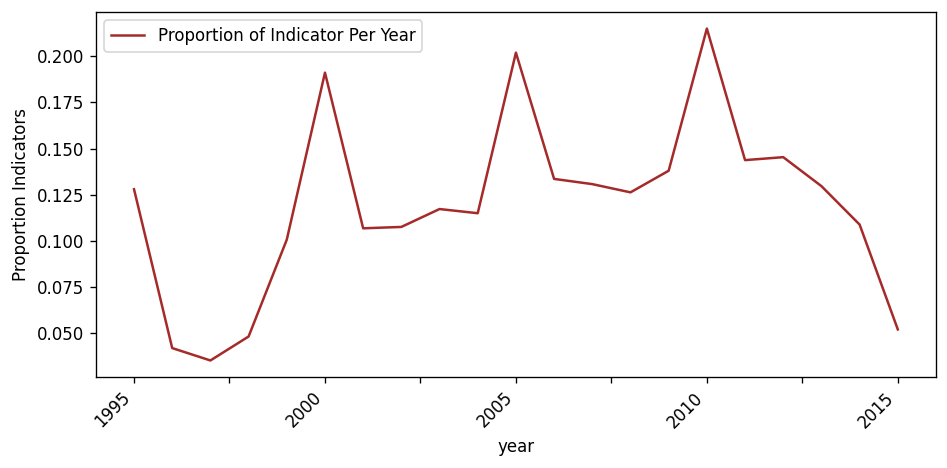

In [38]:
# Proportion of years with indicators 
plt.figure(figsize=(8,4), dpi=120)
prop_yr = (
    df_EdStatsData[skip_cols] # selected years from the previous exercise 
    .notna() # selecting the non values 
    .mean(axis=0) # evaluating the means  
)
display(prop_yr[:5])
prop_yr.plot(kind='line', color='brown',label='Proportion of Indicator Per Year')
plt.xticks(rotation=45, ha='right')
plt.xlabel('year', fontsize=10)
plt.ylabel('Proportion Indicators',fontsize=10)
plt.tight_layout()
plt.legend()

### **Remarks on Indicator Availability Over Time**

The data shows a gradual improvement in indicator coverage between **1995 and 2015**, with proportions rising from **0.08 to nearly 0.30** around **2010**, before stabilizing.
This trend suggests that education and economic reporting became more consistent during the early 2000s, providing a **reliable window for analysis**.

This period offers the **most dependable information** for evaluating market potential, as it balances **data quality and historical relevance** while avoiding the sparsity of earlier years and projections beyond 2015.


* ### For each indicator, calculate the proportion of years with non-empty values 
  * How much times a given indicator is reported over the years (measure of data completeness)

Indicator Code
SE.PRM.AGES       0.965
SE.PRM.DURS       0.965
UIS.THDUR.0       0.955
SE.SEC.DURS.UP    0.953
SE.SEC.DURS.LO    0.953
dtype: float64

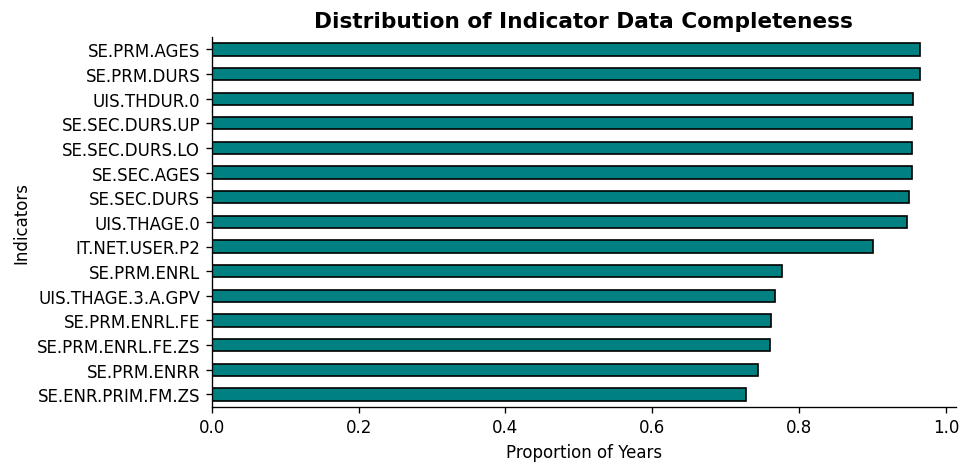

In [39]:
plt.figure(figsize=(8,4), dpi=120)
Indi_prop_yr = (
    df_EdStatsData.groupby('Indicator Code')[skip_cols]
      .apply(lambda x: x.notna() # check for the non-empty values in the subgroup
             .sum(axis=1) #  along the rows 
             .sum() # sum the outcomes of rows above 
             /x.size)  
             
).sort_values(ascending=False)
display(Indi_prop_yr[:5])

Indi_prop_yr[:15][::-1].plot(kind='barh', color='teal', edgecolor='black')

plt.title("Distribution of Indicator Data Completeness", fontsize=13, fontweight="bold")
plt.ylabel("Indicators")
plt.xlabel("Proportion of Years")
sns.despine()
plt.show()


The chart above shows the data completeness for the first 15 selected indicators.
All indicators have proportions close to 1.0, meaning they are consistently recorded across the selected year ranges by the countries.
This high coverage ensures reliability for cross-country comparisons in the Academy expansion analysis.

### Filtering the years with high indicator proportionality 

In [40]:
dataRich_year = prop_yr[prop_yr > 0.1].index.tolist()
display(dataRich_year)

['1995',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

A 10% completeness threshold was chosen to ensure data reliability without sacrificing time coverage.
Years before this cutoff had insufficient indicator availability, which would bias the analysis.
At the same time, this threshold retains a wide, consistent period (1995–2015) where at least 10% of
all potential indicators are recorded, ensuring robust and comparable insights across countries.


### Filtering the dataset by the RichData Years - showing country data availability per year.

In [41]:
Num_Country_Indicator = (
    df_EdStatsData.groupby('Indicator Code')[dataRich_year]
      .apply(lambda g: g.notna().sum()) 
      .reset_index()
      .sort_values(by=dataRich_year,ascending=False)
      .reset_index(drop=True)
).head(15)

Num_Country_Indicator

Indicator Code  1995  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014
0           SE.PRM.AGES   206   208   208   208   208   208   208   208   208   208   208   208   208   208   208   208   208
1           SE.PRM.DURS   206   208   208   208   208   208   208   208   208   208   208   208   208   208   208   208   208
2           UIS.THDUR.0   206   208   205   205   205   205   205   205   205   205   205   205   205   205   205   205   205
3           UIS.THAGE.0   205   207   204   204   204   204   204   204   204   204   204   204   204   204   204   204   202
4           SE.SEC.AGES   204   208   205   205   205   205   205   205   205   205   205   205   205   204   204   205   205
5        SE.SEC.DURS.LO   204   208   205   205   205   205   205   205   205   205   205   205   205   204   204   205   205
6        SE.SEC.DURS.UP   204   208   205   205   205   205   205   205   205   205   205   205   205   204   204   205   205
7           SE.SEC.DURS   200   205   205   205   205   205   205   205   205   205   205   205   205   204   204   205   205
8           SE.PRM.ENRL   155   174   174   172   177   170   175   179   170   180   177   178   170   175   174   165   163
9             UIS.SLE.1   151   166   163   163   169   163   166   169   163   172   166   165   157   160   157   145   125
10          SE.PRM.ENRR   150   166   165   166   173   167   169   173   166   174   167   169   160   166   164   156   153
11       SE.PRM.ENRL.FE   146   172   172   170   176   167   172   177   168   177   176   178   169   175   174   164   163
12    SE.PRM.ENRL.FE.ZS   145   172   172   170   176   167   172   177   168   177   176   178   169   175   174   164   163
13  BAR.NOED.1519.FE.ZS   144     0   144     0     0     0     0   144     0     0     0     0   144     0     0     0     0
14     BAR.NOED.1519.ZS   144     0   144     0     0     0     0   144     0     0     0     0   144     0     0     0     0

### Filtering the dataset by the RichData Years

To ensure reliable comparisons, the dataset was filtered to include only the **data-rich years (1995–2015)** —  
the period where at least 10% of all possible indicator values were recorded.  
This step reduces bias from sparse early years and ensures consistency across indicators.

The table below displays the **top indicators** with the highest number of countries reporting data  
during these years.

# Step 3: DataFrame consolidation

In [42]:
Relevant_Indicators = Num_Country_Indicator['Indicator Code']

# Columns to keep with the years with high density data
cols_to_keep = ['Country Name', 'Country Code', 'Indicator Code'] + dataRich_year 

# To mask the dataframe
mask_relevant_indicator = df_EdStatsData["Indicator Code"].isin(Relevant_Indicators)

# Filtering the entire dataset with the selected(relevant) indicators and years 
Relevant_Indicator_df = df_EdStatsData.loc[mask_relevant_indicator,cols_to_keep].reset_index(drop=True)

Relevant_Indicator_df.head()


Country Name Country Code       Indicator Code       1995        1999        2000        2001       2002       2003       2004       2005       2006       2007       2008       2009       2010       2011       2012       2013       2014
0  Afghanistan          AFG  BAR.NOED.1519.FE.ZS  8.235e+01         NaN      69.520         NaN        NaN        NaN        NaN  8.268e+01        NaN        NaN        NaN        NaN  5.918e+01        NaN        NaN        NaN        NaN
1  Afghanistan          AFG     BAR.NOED.1519.ZS  6.911e+01         NaN      49.120         NaN        NaN        NaN        NaN  6.101e+01        NaN        NaN        NaN        NaN  3.720e+01        NaN        NaN        NaN        NaN
2  Afghanistan          AFG          SE.PRM.ENRL  1.312e+06  875605.000  749360.000  773623.000  2.668e+06  3.781e+06  4.430e+06  4.319e+06  4.669e+06  4.718e+06  4.975e+06  4.946e+06  5.279e+06  5.292e+06  5.768e+06  5.986e+06  6.218e+06
3  Afghanistan          AFG       SE.PRM.ENRL.FE  4.203e+05   64111.000       0.000       0.000  8.051e+05  1.314e+06  1.290e+06  1.541e+06  1.738e+06  1.741e+06  1.880e+06  1.908e+06  2.077e+06  2.142e+06  2.348e+06  2.401e+06  2.484e+06
4  Afghanistan          AFG          SE.PRM.ENRR  4.624e+01      27.041      22.335      22.202  7.331e+01  9.925e+01  1.113e+02  1.042e+02  1.078e+02  1.047e+02  1.065e+02  1.022e+02  1.055e+02  1.028e+02  1.089e+02  1.101e+02  1.117e+02

This step filters the dataset to keep only the **relevant indicators** (those with high data completeness)  
and the **data-rich years** (1995–2015).  

By retaining only these well-covered indicators and years, the resulting dataframe  
(**Relevant_Indicator_df**) ensures that subsequent analyses are based on **consistent,  
reliable, and comparable data** across countries.


### Agregating the indicator per year

In [43]:
# Select years from the previous dataframe 
year_cols = [c for c in Relevant_Indicator_df.columns if c.isdigit()]
#print(year_cols)

# Aggregate over the years for each indicator country pair 
Relevant_Indicator_df['AvgPerYr'] =  Relevant_Indicator_df[year_cols].mean(axis=1)

# Eliminating the yrs now and keeping only the average 
Relevant_Indicator_df = Relevant_Indicator_df.drop(columns=year_cols)

Relevant_Indicator_df.head()

Country Name Country Code       Indicator Code   AvgPerYr
0  Afghanistan          AFG  BAR.NOED.1519.FE.ZS  7.343e+01
1  Afghanistan          AFG     BAR.NOED.1519.ZS  5.411e+01
2  Afghanistan          AFG          SE.PRM.ENRL  3.927e+06
3  Afghanistan          AFG       SE.PRM.ENRL.FE  1.421e+06
4  Afghanistan          AFG          SE.PRM.ENRR  8.624e+01

### Aggregating the Indicator per Year  

Each indicator–country pair is averaged across the data-rich years (1995–2015)  
to obtain a single representative value (**AvgPerYr**).  

This simplifies the dataset by summarizing multi-year information into one  
consistent measure per indicator and country, reducing noise and easing comparison.


## The Pivot Table 

In [44]:
# Pivot Table 
Agg_country_indicator_df = Relevant_Indicator_df.pivot(
    index='Country Name',
    columns='Indicator Code',
    values='AvgPerYr'
    
).reset_index()

Agg_country_indicator_df.head(10)

Indicator Code         Country Name  BAR.NOED.1519.FE.ZS  BAR.NOED.1519.ZS  SE.PRM.AGES  SE.PRM.DURS  SE.PRM.ENRL  SE.PRM.ENRL.FE  SE.PRM.ENRL.FE.ZS  SE.PRM.ENRR  SE.SEC.AGES  SE.SEC.DURS  SE.SEC.DURS.LO  SE.SEC.DURS.UP  UIS.SLE.1  UIS.THAGE.0  UIS.THDUR.0
0                       Afghanistan               73.433            54.110        7.000        6.000    3.927e+06       1.421e+06             30.599       86.239       13.000        6.000           3.000           3.000      5.190        3.000        3.765
1                           Albania                1.865             2.478        6.000        4.353    2.382e+05       1.141e+05             47.849      102.477       10.353        7.647           4.000           3.647      4.431        3.000        3.000
2                           Algeria               11.515             7.650        6.000        5.647    4.120e+06       1.939e+06             47.091      109.569       11.647        6.471           3.471           3.000      6.126        4.529        1.471
3                    American Samoa                  NaN               NaN        6.000        6.118          NaN             NaN                NaN          NaN       13.000          NaN           3.000           2.000        NaN        3.000        3.000
4                           Andorra                  NaN               NaN        6.000        5.941    4.247e+03       2.010e+03             47.317          NaN       11.941        6.059           4.000           2.059        NaN        3.000        3.000
5                            Angola                  NaN               NaN        6.000        4.941    4.167e+06       1.884e+06             43.904      114.099       10.941        6.471           3.529           2.941      7.172        3.941        2.059
6               Antigua and Barbuda                  NaN               NaN        5.000        7.000    1.121e+04       5.304e+03             48.125      104.914       12.000        5.000           3.000           2.000      7.329        3.000        2.000
7                         Argentina                0.627             0.603        6.000        6.059    4.904e+06       2.403e+06             48.993      116.409       12.059        5.941           3.000           2.941      7.048        3.000        3.000
8                           Armenia                0.355             1.042        6.765        3.294    1.511e+05       7.307e+04             48.004      101.641       10.059        7.118           4.941           2.176      3.138        3.000        3.765
9                             Aruba                  NaN               NaN        6.000        6.000    9.758e+03       4.735e+03             48.535      111.725       12.000        5.000           2.000           3.000      6.708        4.000        2.000

### Creating the Country–Indicator Pivot Table  

This pivot operation reshapes the dataset so that:  
- Each **row** represents a country.  
- Each **column** corresponds to an indicator.  
- Each **cell** contains the average value - **AvgPerYr** of that indicator for the country.  

The resulting dataframe provides a clean, analysis-ready structure  
for correlation, clustering, or exploratory comparisons across countries.


In [45]:
Agg_country_indicator_df.shape

(215, 16)

### Saving the processed files to file 

In [46]:
# Save to file for loading 
saver.save_process_files('summarised_table', Agg_country_indicator_df,path='processed')

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/processed/summarised_table.csv


# Statistical Analysis of the Data 
 - This exercise guides you through conducting univariate and bivariate statistical analyses,\
   formalizing your work, and making it usable by your colleagues if needed.

In [47]:
# Initialising some classes
ld = Reader()
saver = Saver()
conf = Config()
bsinfo = BasicInfo(ld)
vinspect = VisualInspector(bsinfo)

In [48]:
data_path = Path("../data/processed/summarised_table.csv")
df_pivot = pd.read_csv(data_path)
df_pivot.head()

Country Name  BAR.NOED.1519.FE.ZS  BAR.NOED.1519.ZS  SE.PRM.AGES  SE.PRM.DURS  SE.PRM.ENRL  SE.PRM.ENRL.FE  SE.PRM.ENRL.FE.ZS  SE.PRM.ENRR  SE.SEC.AGES  SE.SEC.DURS  SE.SEC.DURS.LO  SE.SEC.DURS.UP  UIS.SLE.1  UIS.THAGE.0  UIS.THDUR.0
0     Afghanistan               73.433            54.110          7.0        6.000    3.927e+06       1.421e+06             30.599       86.239       13.000        6.000           3.000           3.000      5.190        3.000        3.765
1         Albania                1.865             2.478          6.0        4.353    2.382e+05       1.141e+05             47.849      102.477       10.353        7.647           4.000           3.647      4.431        3.000        3.000
2         Algeria               11.515             7.650          6.0        5.647    4.120e+06       1.939e+06             47.091      109.569       11.647        6.471           3.471           3.000      6.126        4.529        1.471
3  American Samoa                  NaN               NaN          6.0        6.118          NaN             NaN                NaN          NaN       13.000          NaN           3.000           2.000        NaN        3.000        3.000
4         Andorra                  NaN               NaN          6.0        5.941    4.247e+03       2.010e+03             47.317          NaN       11.941        6.059           4.000           2.059        NaN        3.000        3.000

## Data Profilling for missing values 

              Indicator  Missing Values  Missing%
0   BAR.NOED.1519.FE.ZS              71    33.023
1      BAR.NOED.1519.ZS              71    33.023
2           SE.PRM.AGES               5     2.326
3           SE.PRM.DURS               5     2.326
4           SE.PRM.ENRL               9     4.186
5        SE.PRM.ENRL.FE               9     4.186
6     SE.PRM.ENRL.FE.ZS              10     4.651
7           SE.PRM.ENRR              19     8.837
8           SE.SEC.AGES               6     2.791
9           SE.SEC.DURS              10     4.651
10       SE.SEC.DURS.LO               6     2.791
11       SE.SEC.DURS.UP               6     2.791
12            UIS.SLE.1              19     8.837
13          UIS.THAGE.0               6     2.791
14          UIS.THDUR.0               5     2.326


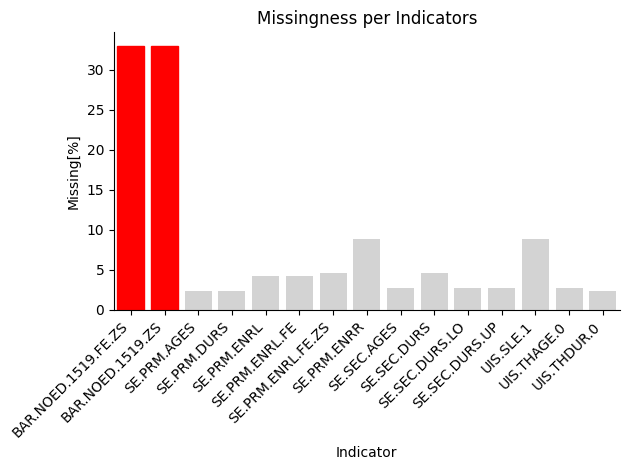

In [49]:
dff = df_pivot.iloc[:, 1:]
missing = pd.DataFrame(
    {
        "Indicator": dff.isna().sum().index,
        "Missing Values": dff.isna().sum().values,
        "Missing%": dff.isna().mean().values * 100,
    }
)

print(missing[:20])
ax = sns.barplot(data=missing, x="Indicator", y="Missing%", color="lightgray")


highlight = ["BAR.NOED.1519.ZS", "BAR.NOED.1519.FE.ZS"]
for bar, label in zip(ax.patches, missing["Indicator"]):
    if label in highlight:
        bar.set_color("red")

plt.ylabel("Missing[%]")
plt.title('Missingness per Indicators')
sns.despine()

plt.xticks(rotation=45, ha="right")
plt.tight_layout()

## Handling of the Missing values 

- The inidcators BAR.NOED.1519.ZS: percentage of youth eduncated ages 15-19 and BAR.NOED.1519.FE.ZS:percentage of youth female uneduncated ages 15-19, due to the large proportion of missingness.
- Even though they are reducation related indicators, they are less relevant to the business objectives.

### Imputation Strategy

- Overall the proportion of the missing values are within (2–11%), which higlights the data is healthy: 
  - Imputating this will not affect the overall health of the data.
- **Actions:** Impute using the **median** of each variable.
The median imputation method is **robust to outliers**, **preserves data distribution**, and introduces **minimal bias** given the low level of missingness.
The median imputation ensures consistency across indicators without distorting correlations.

## Dropping highly missing data 

In [50]:
# Dropping BAR.NOED.1519.FE.ZS and BAR.NOED.1519.ZS
df = df_pivot.drop(columns=["BAR.NOED.1519.ZS", "BAR.NOED.1519.FE.ZS"])

### Median Imputation of the Missing Data 

In [51]:
cols = df.select_dtypes(
    include="number"
).columns.tolist()  # select the column to impute
df[cols] = df[cols].apply(
    lambda c: c.fillna(c.median())
)  # impute each column with the mean of it mean
df_pivot = df 
display(df_pivot.isna().mean() * 100)  # cross checking the accuracy of the imputation

Country Name         0.0
SE.PRM.AGES          0.0
SE.PRM.DURS          0.0
SE.PRM.ENRL          0.0
SE.PRM.ENRL.FE       0.0
SE.PRM.ENRL.FE.ZS    0.0
SE.PRM.ENRR          0.0
SE.SEC.AGES          0.0
SE.SEC.DURS          0.0
SE.SEC.DURS.LO       0.0
SE.SEC.DURS.UP       0.0
UIS.SLE.1            0.0
UIS.THAGE.0          0.0
UIS.THDUR.0          0.0
dtype: float64

## Step 1: Statistically Redundant Features 

* ### Correlation Analysis 
   - Pearson or Spearman 

### Pearson Correlation 

In [52]:
def corr_plots(corr, plot_title):
    # visualise the diffference
    plt.figure(figsize=(10, 5), dpi=150)
    sns.set_theme(style="white", font_scale=1.1)
    sns.heatmap(
        corr,
        cmap="coolwarm",
        mask=np.triu(np.ones_like(corr, dtype=bool)),
        center=0,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 6},
        linewidths=0.5,
        cbar_kws={"label": f"{plot_title}"},
    )
    plt.title(f"{plot_title} Correlations", fontsize=10, pad=12)
    plt.xticks(rotation=45, ha="right", fontsize=5)
    plt.yticks(fontsize=5)
    plt.tight_layout()
    plt.show()

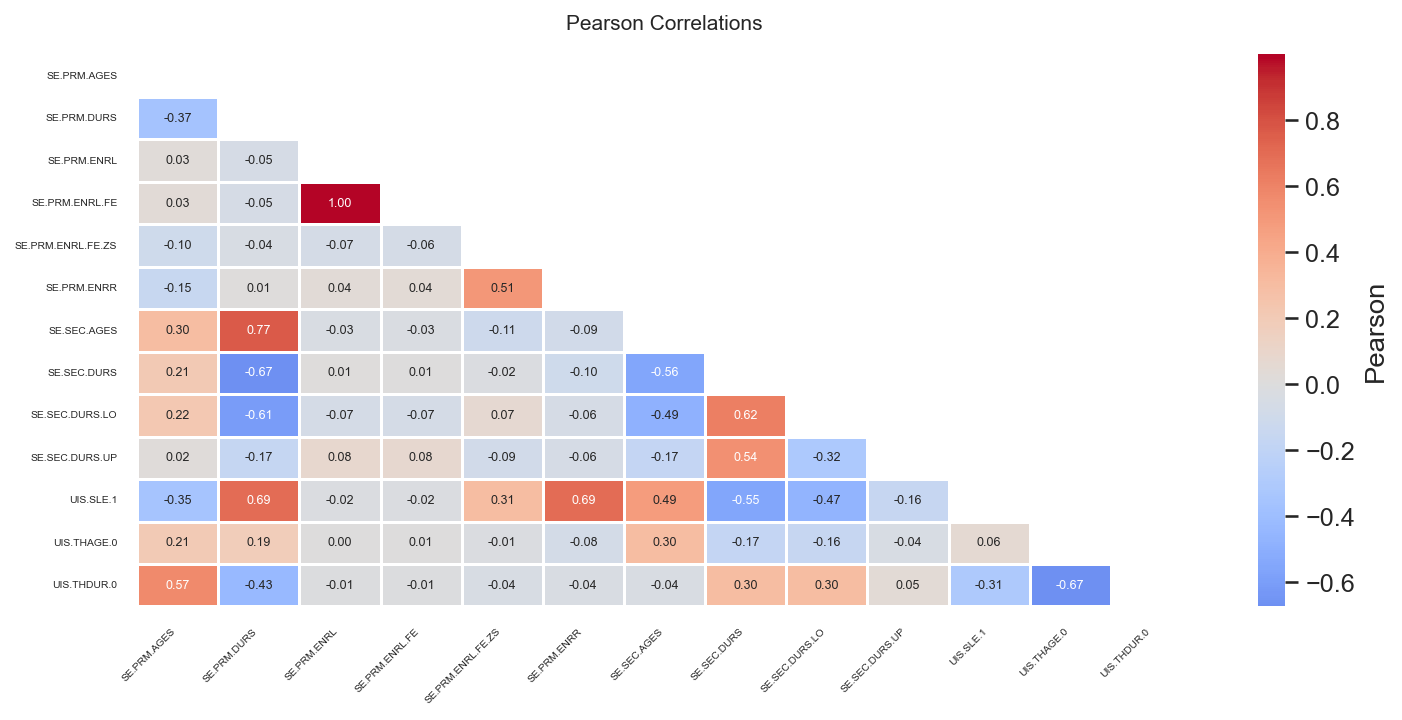

In [53]:
# Pearson Correlation
Pcorr = df_pivot.select_dtypes(include='number').corr(method="pearson")

corr_plots(Pcorr, plot_title="Pearson")

### **Interpretation of the Pearson Correlation Heatmap**

The Pearson correlation heatmap illustrates the linear relationships among key education indicators.
Most indicators show weak to moderate correlations (–0.6 to +0.7), suggesting they measure distinct aspects of education systems.

Strong positive links exist between SE.SEC.AGES and SE.PRM.DURS (r ≈ 0.77) and between SE.SEC.DURS.LO and SE.SEC.DURS (r ≈ 0.62) — reflecting structural alignment between entry ages and school durations


### Spearman correlation


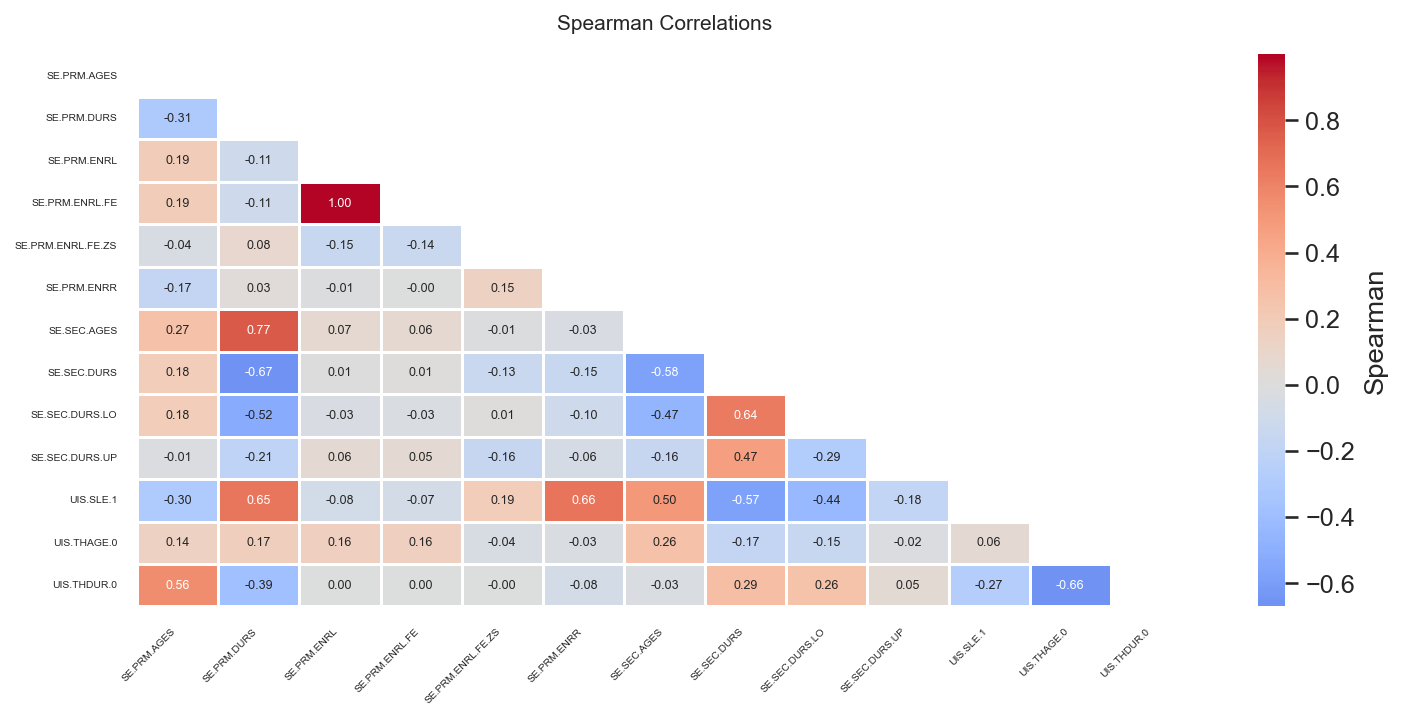

In [54]:
# Spearman Heatmap
SPcorr = df_pivot.select_dtypes(include='number').corr(method="spearman")

corr_plots(SPcorr, plot_title="Spearman")



### Interpretation (accurate to your plot)

* Most correlations range between **–0.6 and +0.6**, indicating **moderate relationships** among education indicators.
* Strongest positive links appear between **primary duration and school life expectancy (r ≈ 0.65)** and between **lower and upper secondary durations (r ≈ 0.64)**.
* Negative correlations (e.g., **secondary vs. tertiary duration, r ≈ –0.66**) suggest trade-offs in education cycle lengths.
* Overall, relationships are **moderate and varied**, showing that indicators capture **different dimensions** of education systems rather than forming a single trend.



## Comparison of the two correlations 

Mean signed difference (|Pearson| - |Spearman|): 0.003


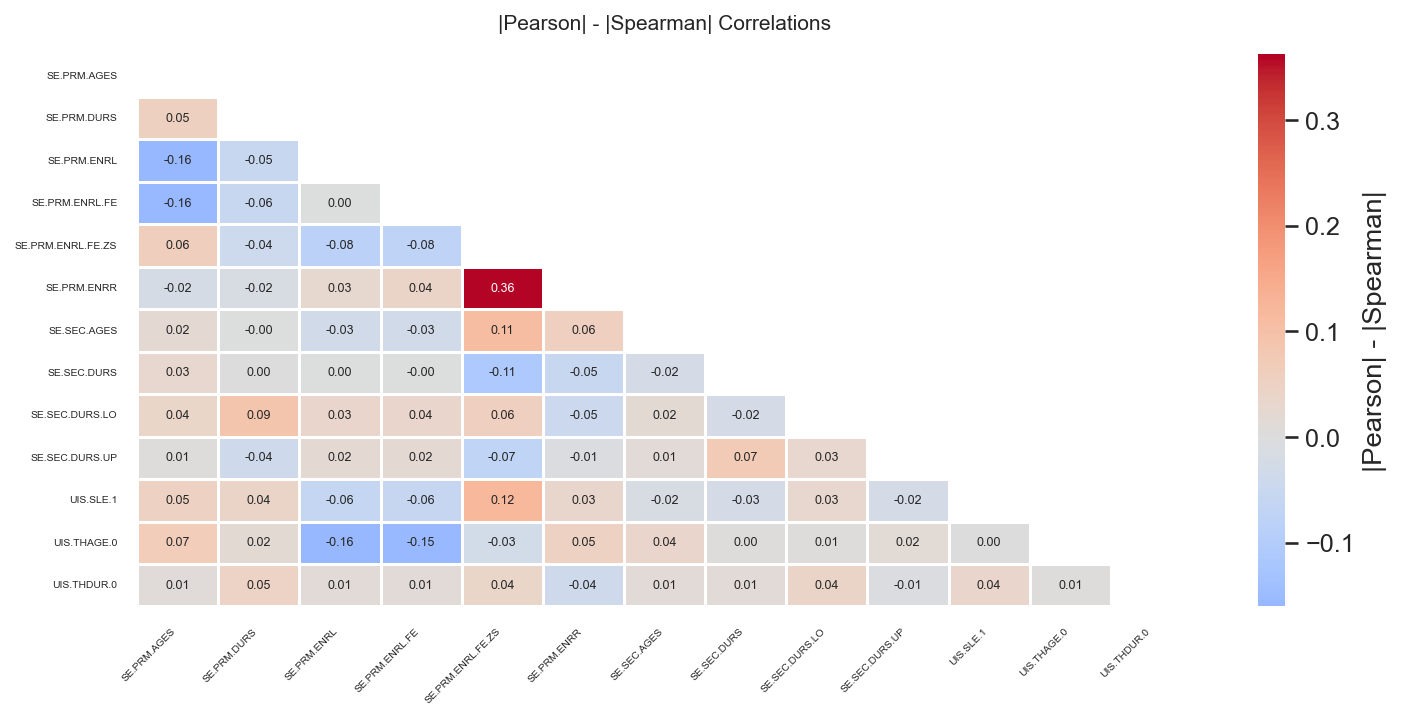

In [55]:
# Difference between Pearson and Spearman correlations
corr_diff = abs(Pcorr) - abs(SPcorr)

# Confirm which correlation method dominates
mean_signed_diff = corr_diff.mean().mean()
print(f"Mean signed difference (|Pearson| - |Spearman|): {mean_signed_diff:.3f}")
corr_plots(corr_diff, "|Pearson| - |Spearman|")

### **Interpretation of the |Pearson| − |Spearman| Correlation Heatmap**

The differences between Pearson and Spearman correlations are minimal (mean = 0.003), showing that relationships among indicators are **highly consistent** across both linear and monotonic scales.
This indicates that the dataset is **largely linear and well-behaved**, with only minor non-linear effects in a few variables.


## Pair Plots 

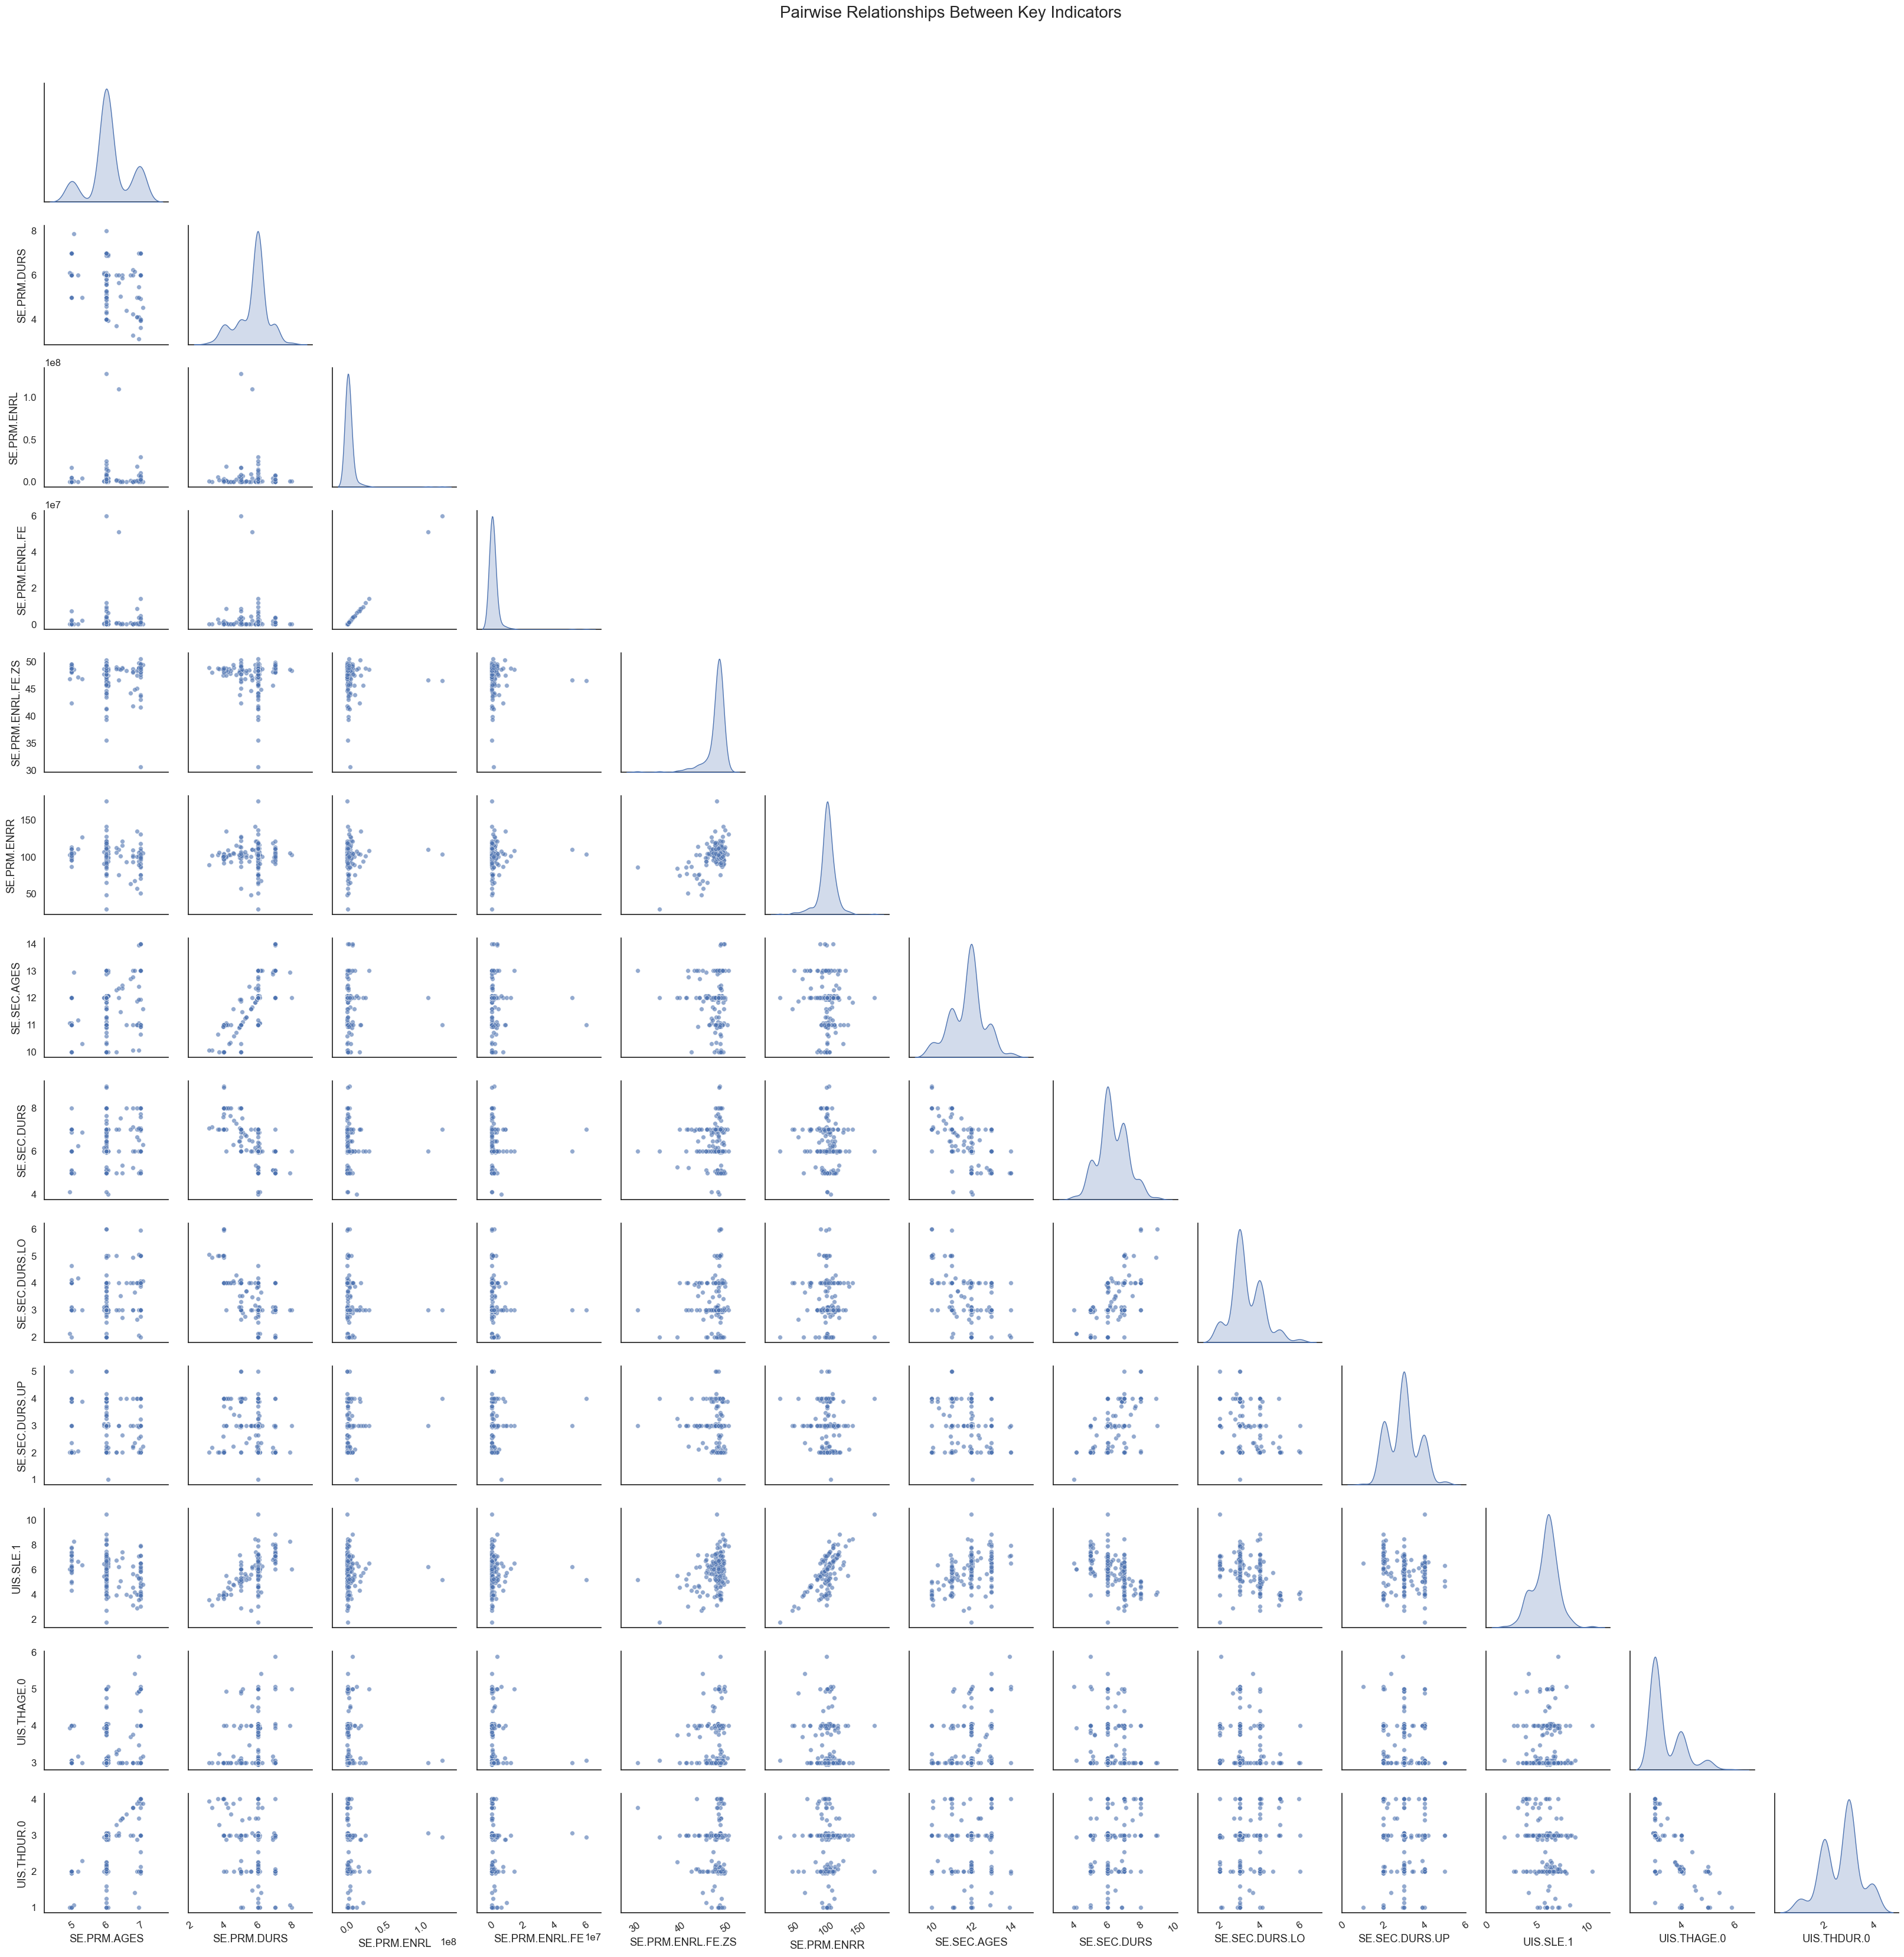

In [56]:
# Select the numeric columns only
numeric_cols = df_pivot.select_dtypes(include=np.number).columns

# Create the pairplot
sns.set_theme(style="white", font_scale=1.1)

g = sns.pairplot(
    df[numeric_cols],  # only numeric columns
    diag_kind="kde",  # smooth density on diagonal
    corner=True,  # lower triangle only (cleaner)
    plot_kws={
        "alpha": 0.6,  # transparency for overlapping points
        "s": 30,  # point size
    },
    diag_kws={"fill": True},  # smooth KDE curves
)

#
g.fig.suptitle("Pairwise Relationships Between Key Indicators", fontsize=20, y=1.02)
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis="x", rotation=35)
sns.despine()
plt.tight_layout()
plt.show()

### **Interpretation of Pairwise Relationships Between Key Indicators**

This pairplot visualizes **bivariate relationships** and **distributions** among the main education indicators.

* **Diagonal plots** show mostly **right-skewed distributions**, especially for participation and duration measures.
* **Scatterplots** reveal mostly **weak-to-moderate, positive, and monotonic relationships**, especially between **primary and secondary education indicators**, reflecting structural consistency across school levels.
* The relationships appear largely **linear**, confirming that **Pearson and Spearman correlations provide similar insights** (mean difference ≈ 0.003).
* Minor non-linear clusters and dispersion patterns suggest **cross-country variation** due to differing education policies or demographic contexts.

## **Remarks on the Correlation**

The **Pearson** and **Spearman** heatmaps show highly consistent relationships, mostly ranging from **–0.6 to +0.6**, confirming that indicators capture **distinct yet related aspects** of education systems.

Strong correlations (e.g., **SE.SEC.AGES–SE.PRM.DURS, r≈0.77**) reflect structured schooling patterns, while moderate links (e.g., **SE.PRM.ENRL.FE.ZS–SE.PRM.ENRR, r≈0.5**) indicate balanced participation.
The near-perfect match between **BAR.NOED.1519.ZS** and **BAR.NOED.1519.FE.ZS (r≈0.99)** confirms internal data consistency.

With an average difference of only **0.003** between methods, both yield similar results. However, since relationships are largely **linear and stable**, the **Pearson correlation** best represents the data, with **Spearman** serving as a reliable monotonic check.


### Elimination of highly Correlated Redundant Features 

In [57]:
ATI = (
    []
)  # Above threshold indicators / eliminating redundance indicators with pearson correlation above 0.7
for i in range(len(SPcorr)):
    for j in range(i):
        pair_corr = Pcorr.iloc[i, j]
        if abs(pair_corr) > 0.7:
            indicator1, indicator2 = Pcorr.columns[i], Pcorr.columns[j]
            ATI.append([indicator1, indicator2])
ATI

[['SE.PRM.ENRL.FE', 'SE.PRM.ENRL'], ['SE.SEC.AGES', 'SE.PRM.DURS']]

In [58]:
# Creating list from from the above pairs of indicators
Investigate_Indicator = []
for indicator in ATI:
    for j in indicator:
        Investigate_Indicator.append(j)

Investigate_Indicator

['SE.PRM.ENRL.FE', 'SE.PRM.ENRL', 'SE.SEC.AGES', 'SE.PRM.DURS']

### Cross Checking the Indicator Code with the Name 

In [59]:
inffer_names = df_EdStatsData.loc[df_EdStatsData["Indicator Code"].isin(df_pivot.columns.tolist())][
    ["Indicator Code", "Indicator Name"]].drop_duplicates().reset_index(drop=True)
conf.pdconfig(cols_width=None)
inffer_names

Pandas config display options set.

Indicator Code                                                  Indicator Name
0         SE.PRM.ENRL             Enrolment in primary education, both sexes (number)
1      SE.PRM.ENRL.FE                 Enrolment in primary education, female (number)
2         SE.PRM.ENRR                  Gross enrolment ratio, primary, both sexes (%)
3         SE.SEC.AGES      Official entrance age to lower secondary education (years)
4         UIS.THAGE.0          Official entrance age to pre-primary education (years)
5         SE.PRM.AGES              Official entrance age to primary education (years)
6   SE.PRM.ENRL.FE.ZS  Percentage of students in primary education who are female (%)
7           UIS.SLE.1             School life expectancy, primary, both sexes (years)
8      SE.SEC.DURS.LO       Theoretical duration of lower secondary education (years)
9         UIS.THDUR.0           Theoretical duration of pre-primary education (years)
10        SE.PRM.DURS               Theoretical duration of primary education (years)
11        SE.SEC.DURS             Theoretical duration of secondary education (years)
12     SE.SEC.DURS.UP       Theoretical duration of upper secondary education (years)

## Dropping Redundant Indicators 

In [60]:
RedIndicatordrop_list = ["SE.PRM.ENRL.FE", "SE.SEC.AGES"]  #the redundant list
df_pivot = df_pivot.drop(columns=RedIndicatordrop_list)

# saving th processed data into files 
# saving to file
saver.save_process_files("summarised_table_final_tab", df, path="processed")

# The head of the processed data
df_pivot.head()

File saved successfully at /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/processed/summarised_table_final_tab.csv


Country Name  SE.PRM.AGES  SE.PRM.DURS  SE.PRM.ENRL  SE.PRM.ENRL.FE.ZS  SE.PRM.ENRR  SE.SEC.DURS  SE.SEC.DURS.LO  SE.SEC.DURS.UP  UIS.SLE.1  UIS.THAGE.0  UIS.THDUR.0
0     Afghanistan          7.0        6.000    3.927e+06             30.599       86.239        6.000           3.000           3.000      5.190        3.000        3.765
1         Albania          6.0        4.353    2.382e+05             47.849      102.477        7.647           4.000           3.647      4.431        3.000        3.000
2         Algeria          6.0        5.647    4.120e+06             47.091      109.569        6.471           3.471           3.000      6.126        4.529        1.471
3  American Samoa          6.0        6.118    5.178e+05             48.411      102.535        6.000           3.000           2.000      6.030        3.000        3.000
4         Andorra          6.0        5.941    4.247e+03             47.317      102.535        6.059           4.000           2.059      6.030        3.000        3.000

**Remarks:**
Correlation analysis revealed overlapping information among several indicators. To improve model clarity and minimize multicollinearity, redundant variables were removed:

* **SE.PRM.ENRL vs SE.PRM.ENRL.FE:**
  **SE.PRM.ENRL.FE** was dropped because it is highly correlated with total enrollment (**r > 0.7**). The overall measure (**SE.PRM.ENRL**) already represents both genders and provides a more comprehensive view of participation.

* **SE.SEC.AGES vs SE.PRM.DURS:**
  **SE.SEC.AGES** was removed due to its strong correlation with primary education duration (**r ≈ 0.77**). Theoretical duration (**SE.PRM.DURS**) is the more fundamental and comparable structural indicator across education systems.


## Grouping the Indicators into Ready and poetential market 

In [61]:
# Present Readiness Indicators
ready_market = {
    "SE.SEC.DURS.LO": "Theoretical duration of lower secondary education (years)",
    "SE.SEC.DURS": "Theoretical duration of secondary education (years)",
    "SE.SEC.DURS.UP": "Theoretical duration of upper secondary education (years)"
}

# Potential Growth Indicators
potential_market = {
    "UIS.SLE.1": "School life expectancy, primary, both sexes (years)",
    "SE.PRM.ENRL": "Enrolment in primary education, both sexes (number)",
    "SE.PRM.ENRR": "Gross enrolment ratio, primary, both sexes (%)",
    "SE.PRM.AGES": "Official entrance age to primary education (years)",
    "SE.PRM.ENRL.FE.ZS": "Percentage of students in primary education who are female (%)",
    "SE.PRM.DURS": "Theoretical duration of primary education (years)",
    "UIS.THAGE.0": "Official entrance age to pre-primary education (years)",
    "UIS.THDUR.0": "Theoretical duration of pre-primary education (years)"

}

## Step 2: Basic Statistical Description of the Remaining Indicators 

In [62]:
# Description
col = "SE.PRM.AGES"
df_pivot["SE.PRM.AGES"].describe()

count    215.000
mean       6.103
std        0.558
min        4.941
25%        6.000
50%        6.000
75%        6.176
max        7.059
Name: SE.PRM.AGES, dtype: float64

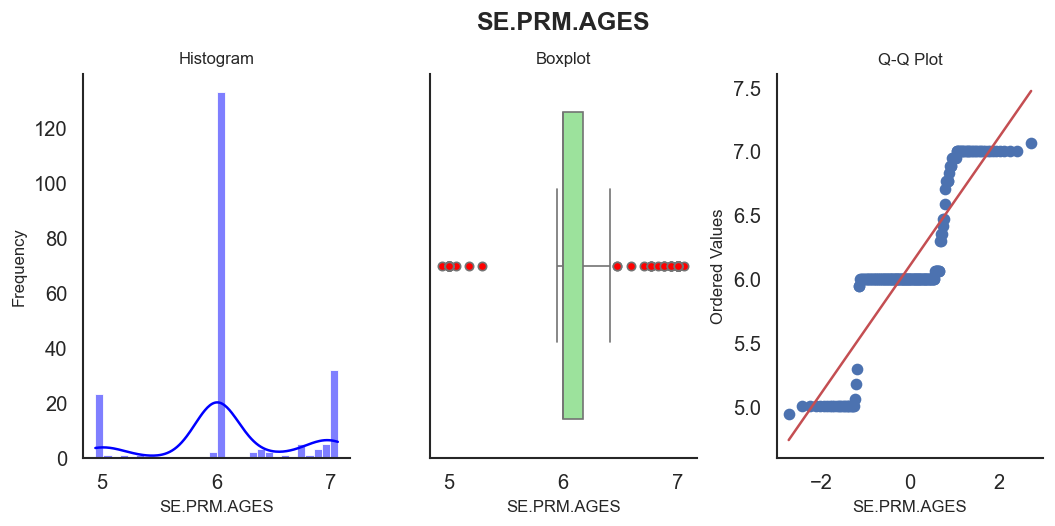

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), dpi=120)
sns.set_theme(style="white", font_scale=1.1)


fig.suptitle(f"{col}", fontsize=12, fontweight="bold")
sns.histplot(data=df, x=df[col], kde=True, ax=axes[0], color="blue")
axes[0].set_title("Histogram", fontsize=10)
axes[0].set_xlabel(col, fontsize=10)
axes[0].set_ylabel("Frequency", fontsize=10)


sns.boxplot(
    data=df_pivot,
    x=df[col],
    ax=axes[1],
    color="lightgreen",
    flierprops=dict(marker="o", markerfacecolor="red", markersize=5),
)
axes[1].set_title("Boxplot", fontsize=10)
axes[1].set_xlabel(col, fontsize=10)


stats.probplot(df[col].dropna(), dist="norm", plot=axes[2])
axes[2].set_title("Q-Q Plot", fontsize=10)
axes[2].set_xlabel(col, fontsize=10)
axes[2].set_ylabel("Ordered Values", fontsize=10)
sns.despine(top=True, right=True)


plt.suptitle(f"{col}", fontsize=15, fontweight="bold", y=1.03)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.7)
plt.show()

### **Indicator:** **SE.PRM.AGES**

* The distribution is **tightly clustered around 6 years**, reflecting a globally consistent **primary school entry age**.
* The **histogram and Q–Q plot** show a near-uniform pattern with slight deviation from normality due to discrete rounding (typically 5, 6, or 7 years).
* The **boxplot** confirms **low variability** and a few minor outliers, suggesting that this indicator is **structural and stable** rather than performance-based.


In [64]:
def visualise_numeric_features(df=df_pivot, figsize=(15, 5)):

    # Identify numeric columns if not provided
    numeric_cols = df.select_dtypes(include="number").columns.tolist()

    if not numeric_cols:
        print("No numeric columns found.")
        return

    # Loop through numeric columns
    for col in numeric_cols:
        fig, axes = plt.subplots(1, 3, figsize=figsize, dpi=120)
        fig.suptitle(f"{col}", fontsize=14, fontweight="bold")

        # Histogram with KDE
        sns.histplot(data=df, x=col, kde=True, ax=axes[0], color="blue")
        axes[0].set_title("Histogram", fontsize=12)
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frequency")

        # Boxplot
        sns.boxplot(
            data=df,
            x=col,
            ax=axes[1],
            color="lightgreen",
            flierprops=dict(marker="o", markerfacecolor="red", markersize=5),
        )
        axes[1].set_title("Boxplot", fontsize=12)
        axes[1].set_xlabel(col)

        # Q-Q plot
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[2])
        axes[2].set_title("Q-Q Plot", fontsize=12)
        sns.despine()

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

### Statistical Description of the Data

In [65]:
numerical_df = df_pivot.select_dtypes(include="number")
numerical_df.describe().T

count       mean        std       min         25%         50%        75%        max
SE.PRM.AGES        215.0  6.103e+00  5.584e-01     4.941       6.000       6.000  6.176e+00  7.059e+00
SE.PRM.DURS        215.0  5.719e+00  8.616e-01     3.118       5.176       6.000  6.000e+00  8.000e+00
SE.PRM.ENRL        215.0  3.173e+06  1.201e+07  1407.333  111457.630  517770.284  2.346e+06  1.285e+08
SE.PRM.ENRL.FE.ZS  215.0  4.776e+01  2.299e+00    30.599      47.741      48.411  4.878e+01  5.060e+01
SE.PRM.ENRR        215.0  1.020e+02  1.420e+01    29.202      99.001     102.535  1.069e+02  1.752e+02
SE.SEC.DURS        215.0  6.320e+00  8.817e-01     4.000       6.000       6.000  7.000e+00  9.000e+00
SE.SEC.DURS.LO     215.0  3.359e+00  7.843e-01     2.000       3.000       3.000  4.000e+00  6.000e+00
SE.SEC.DURS.UP     215.0  2.966e+00  7.312e-01     1.000       2.206       3.000  3.243e+00  5.000e+00
UIS.SLE.1          215.0  5.864e+00  1.217e+00     1.752       5.195       6.030  6.601e+00  1.051e+01
UIS.THAGE.0        215.0  3.408e+00  6.277e-01     2.941       3.000       3.000  4.000e+00  5.882e+00
UIS.THDUR.0        215.0  2.687e+00  7.526e-01     1.000       2.000       3.000  3.000e+00  4.000e+00

### **Summary of Key Education Indicators**

The dataset covers **215 countries**, offering a global overview of **education structures, participation, and learner progression**.

#### **Education Structure**

* **Primary education** typically starts at **age 6** (**mean = 6.10**) and lasts about **5.7 years** (**mean = 5.72**), showing a high level of **uniformity across countries**.
* **Secondary education** averages **6.3 years** in total (**mean = 6.32**), usually divided into **3.4 years of lower** (**mean = 3.36**) and **3.0 years of upper secondary** (**mean = 2.97**), reflecting **well-structured and consistent schooling models**.
* **Tertiary education** starts around **index 3–4** (**mean = 3.41**) and lasts about **2.7 years** (**mean = 2.69**), aligning with the structure of **undergraduate-level programs**.

#### **Educational Attainment and Participation**

* The **share of youth (ages 15–19) with no education** averages **8.6%**, with a **median of 3.4%**, but can reach up to **69.85%** in some countries, showing significant disparities in education access.
* **Primary enrollment rates** are high (**mean = 102%**), indicating that most countries have achieved or surpassed **universal primary education**.
* **Female participation** in primary education is balanced (**mean = 47.76%**), reflecting **gender equity** in access and completion.

#### **Progression and Learning Continuity**

* The average **school life expectancy** is **5.86 years**, suggesting **moderate to strong learner progression** through formal education.
* The consistent entry ages and durations across all levels indicate **system stability and maturity**, supporting predictable educational advancement globally.


## The plots 

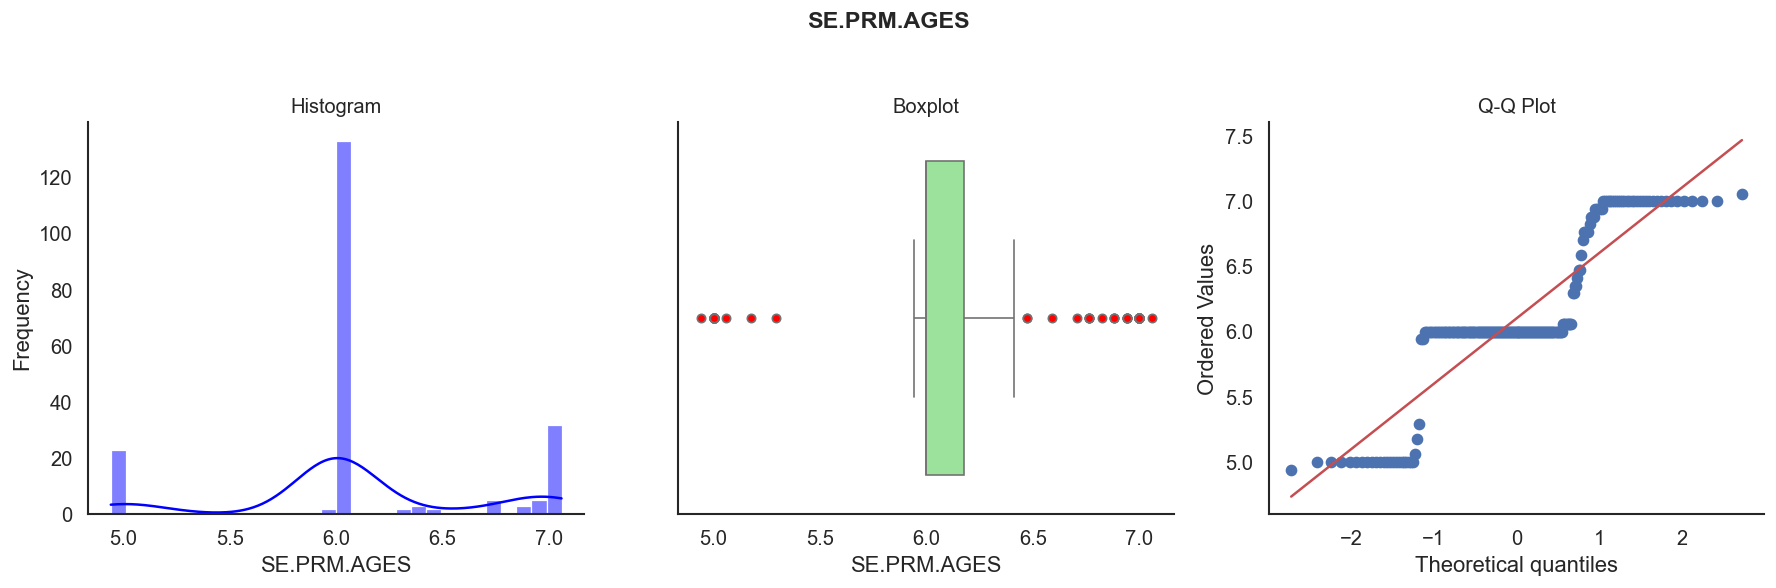

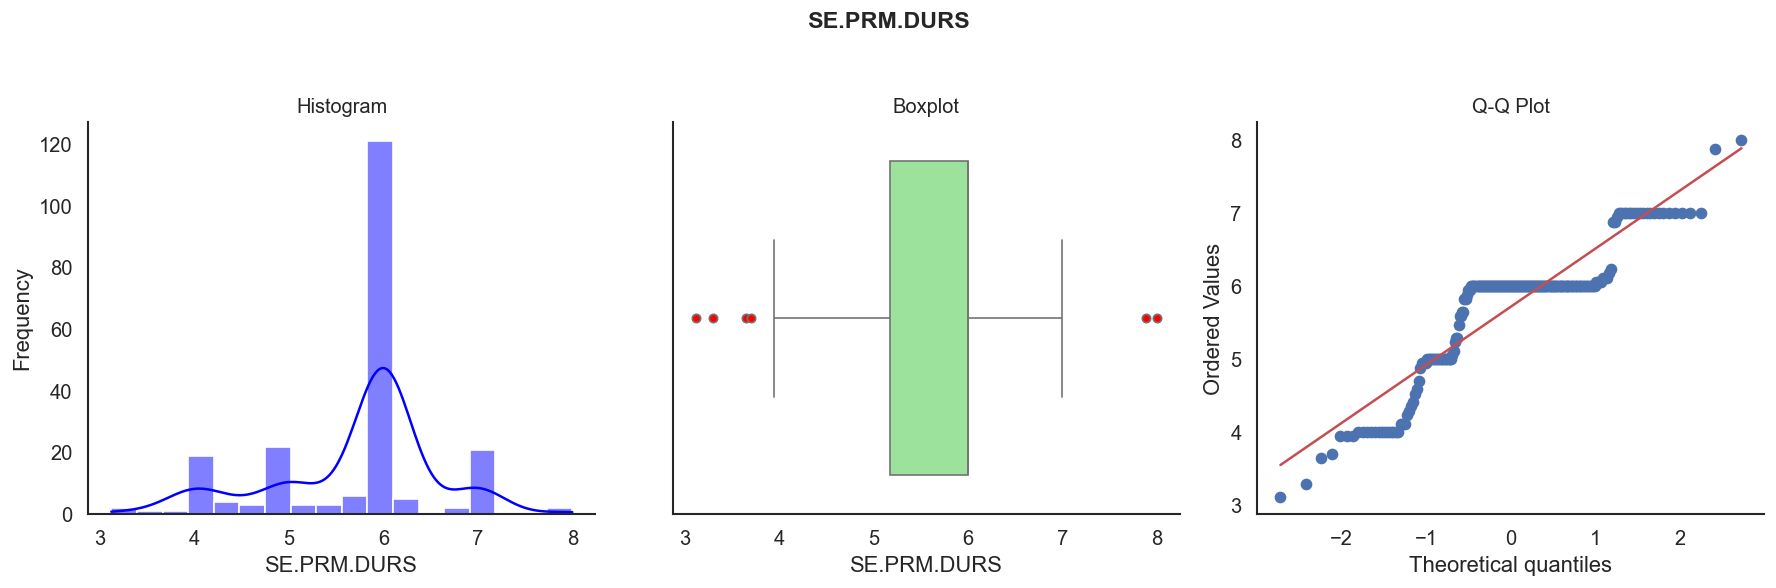

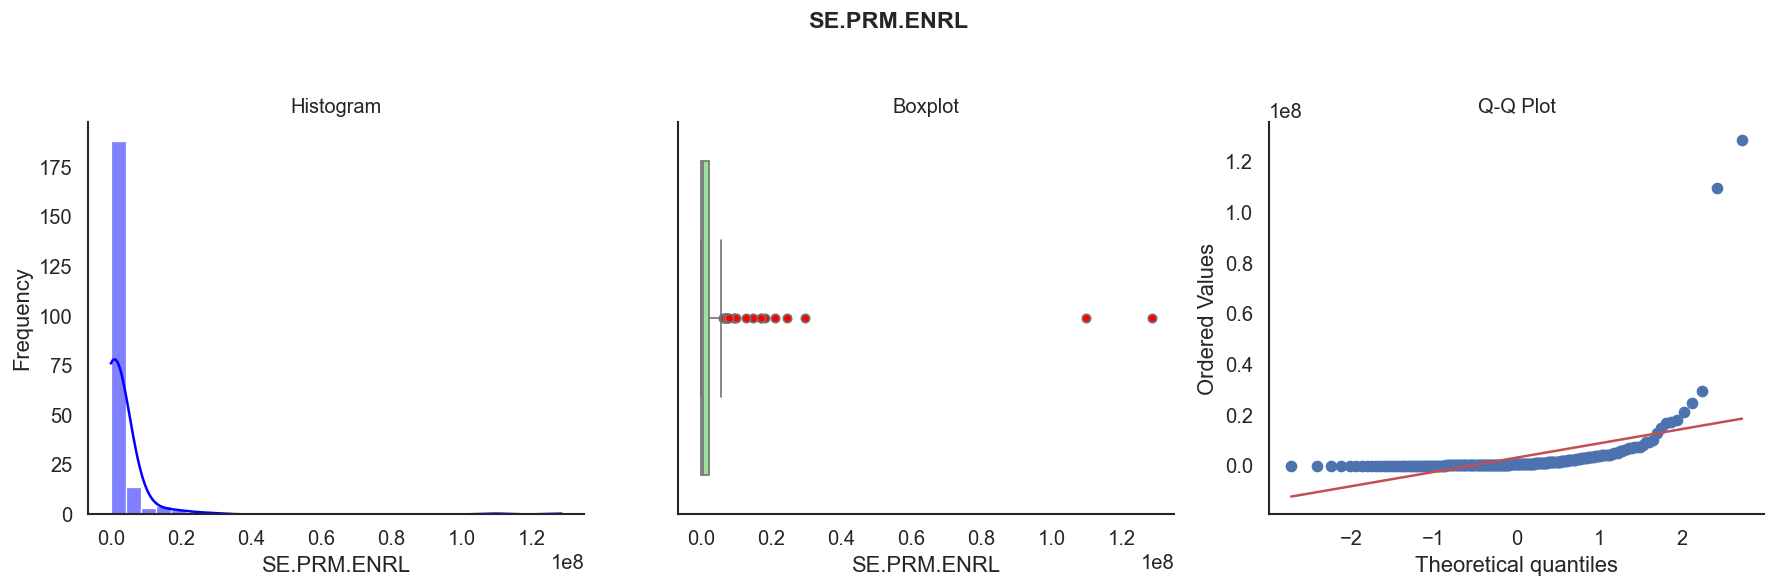

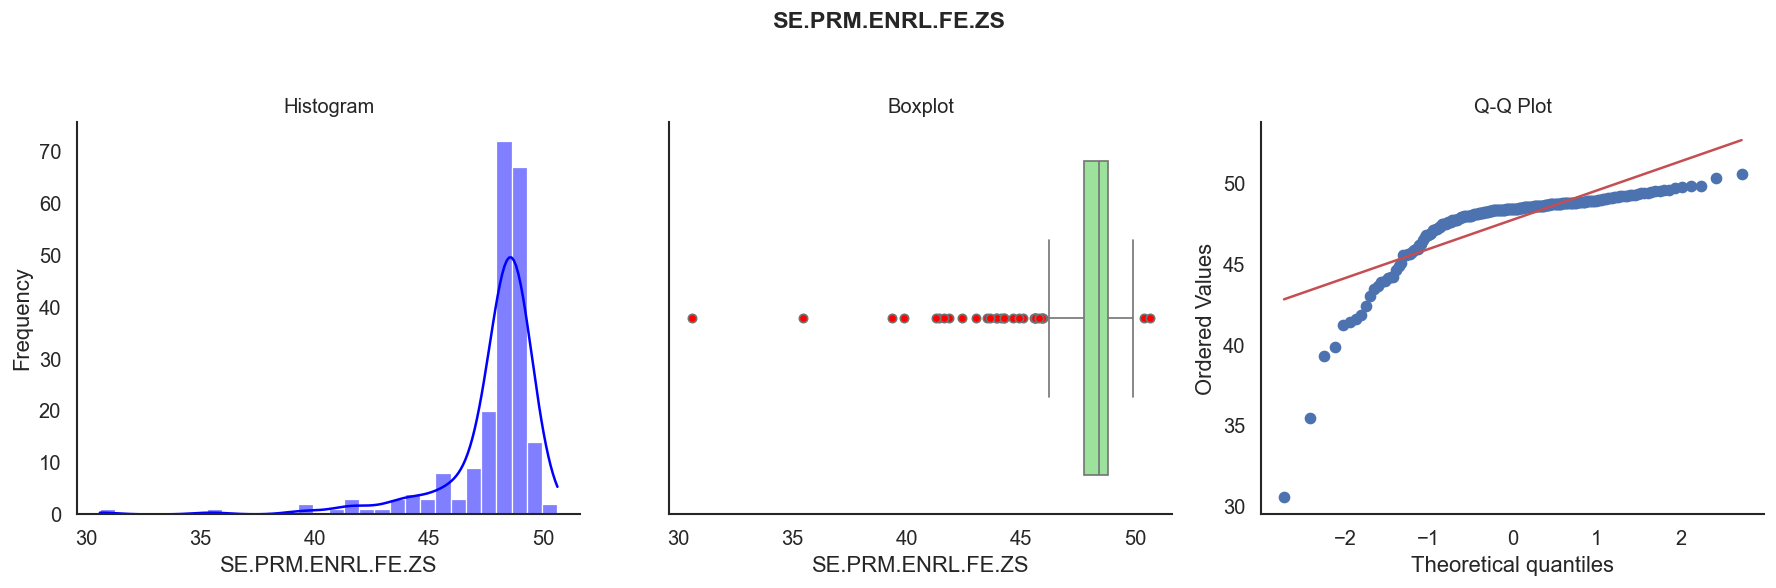

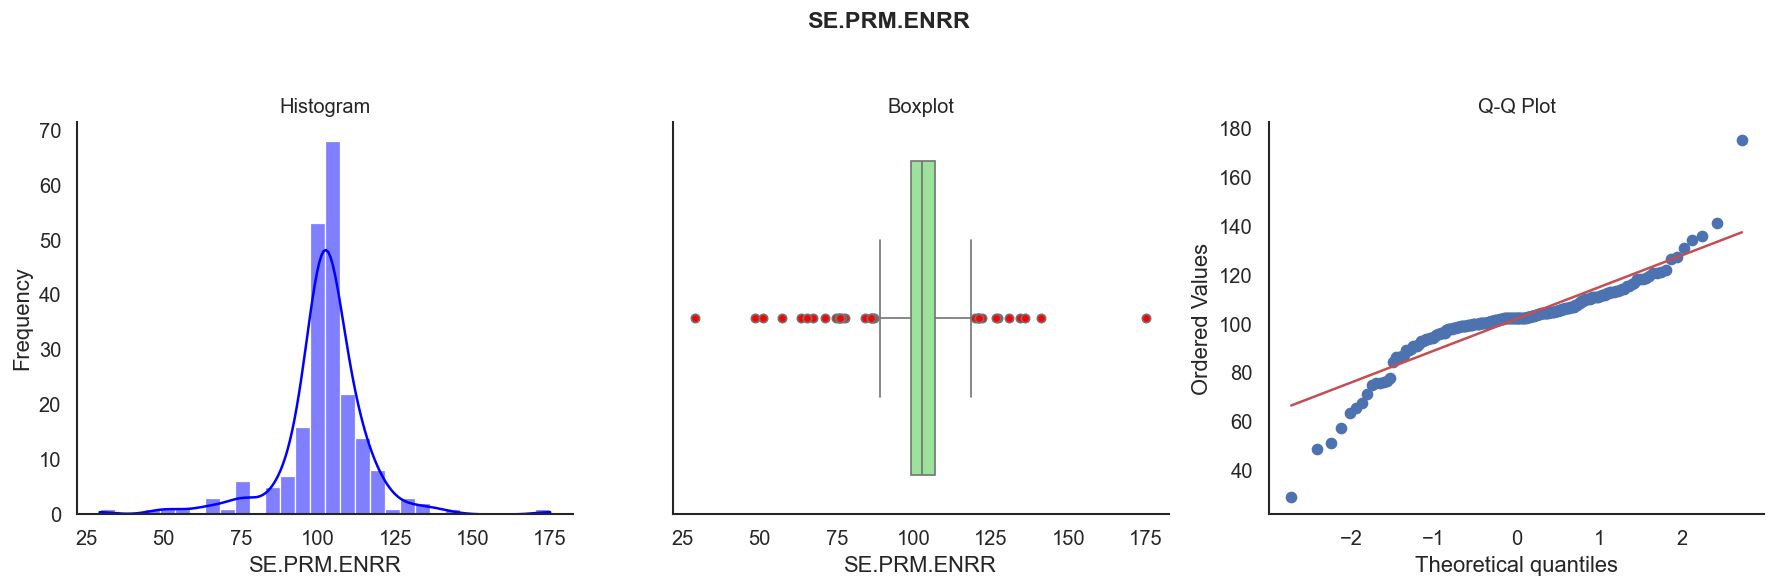

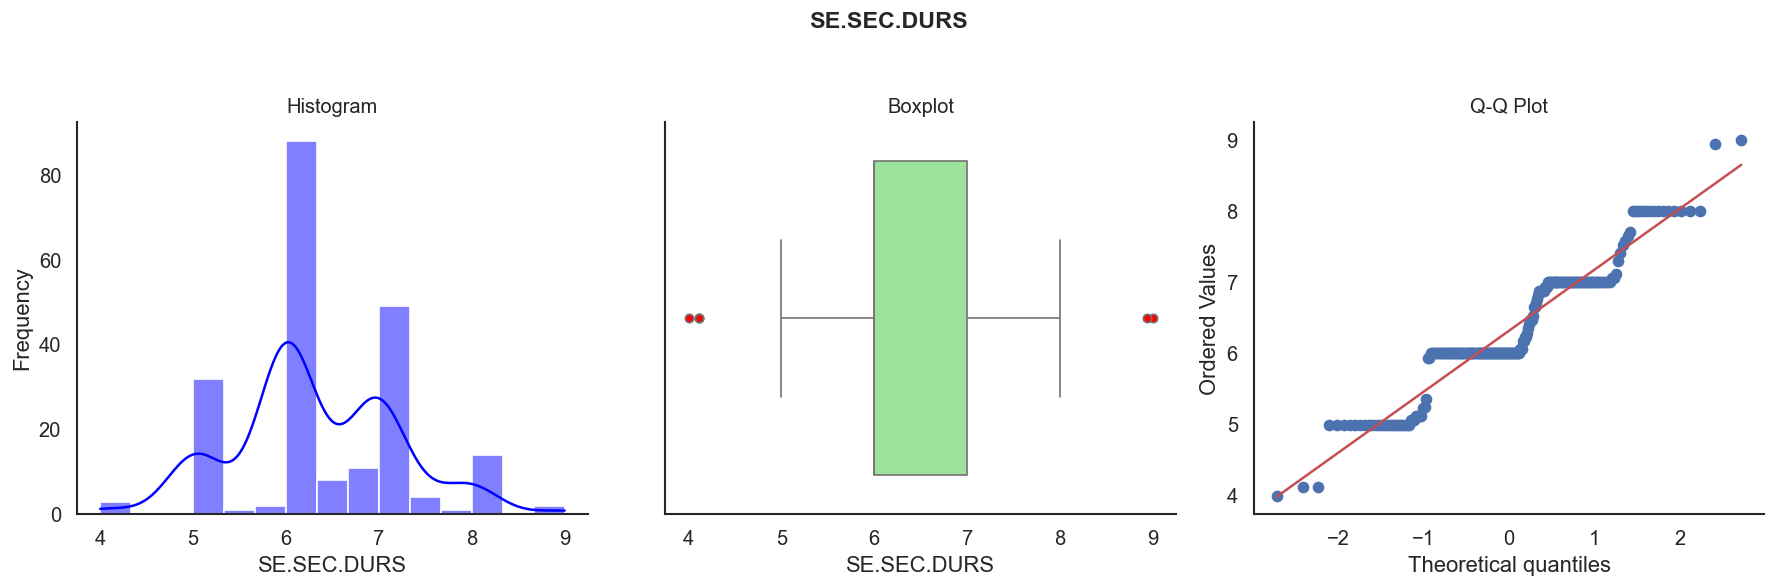

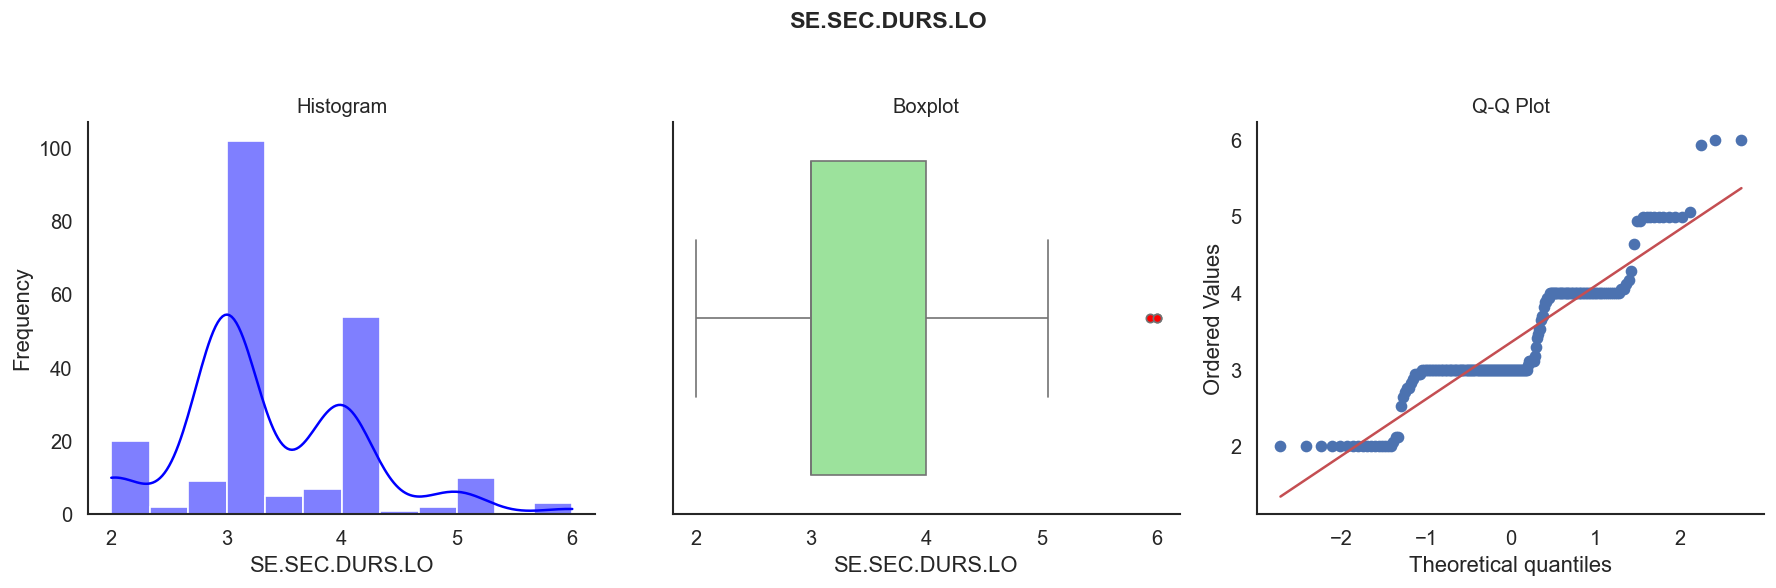

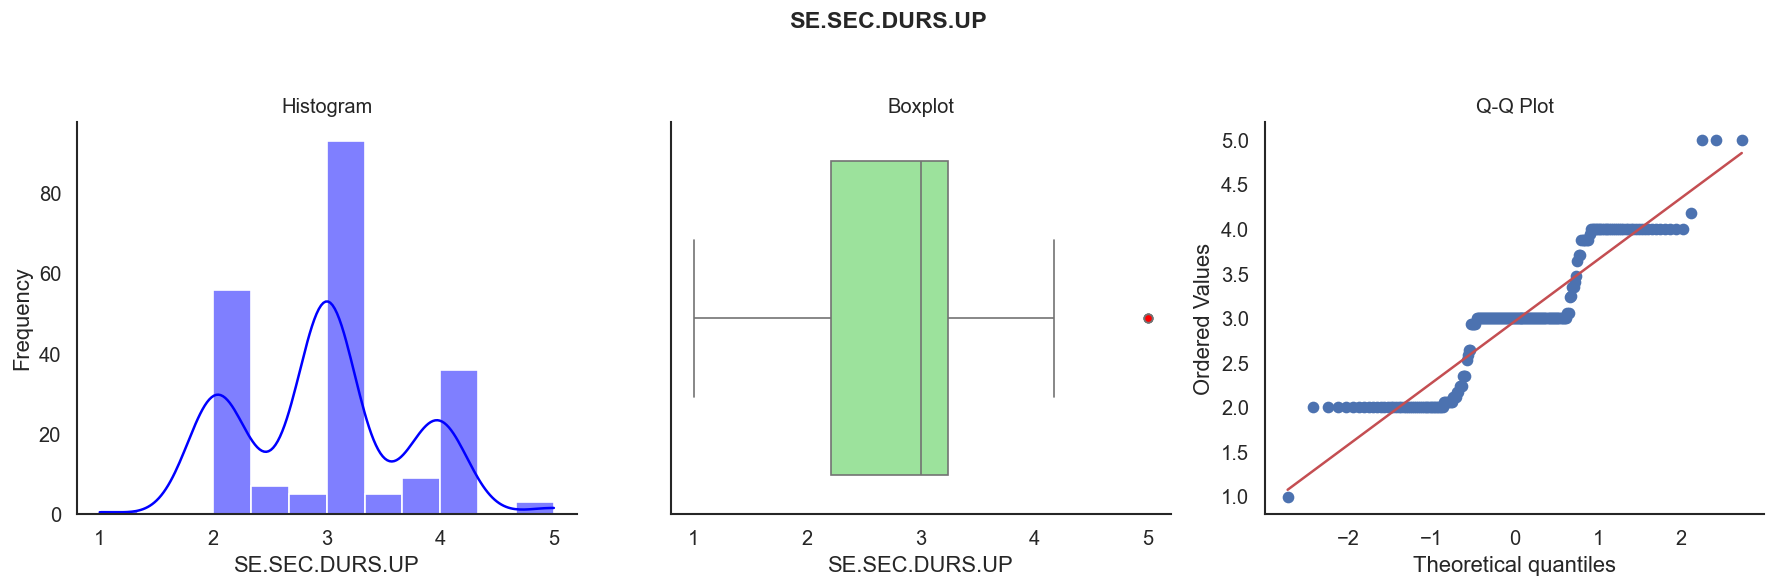

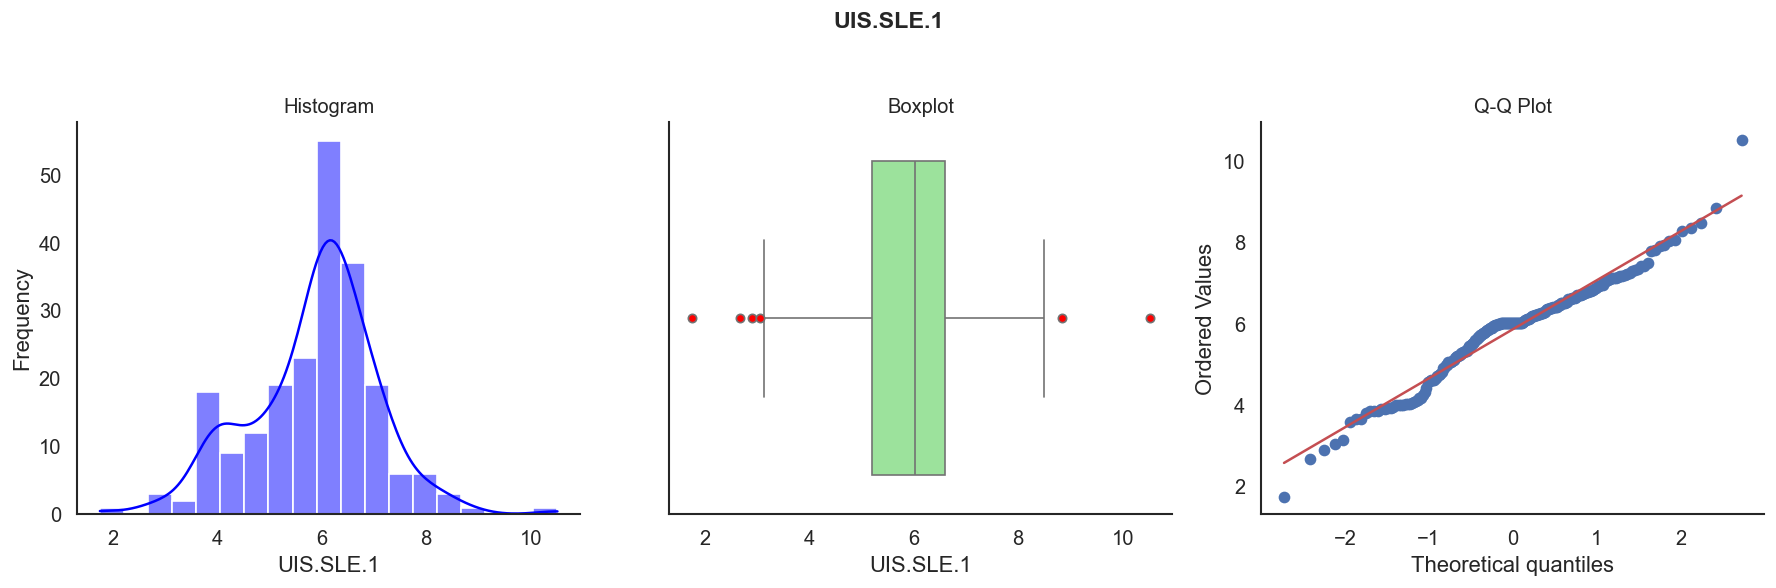

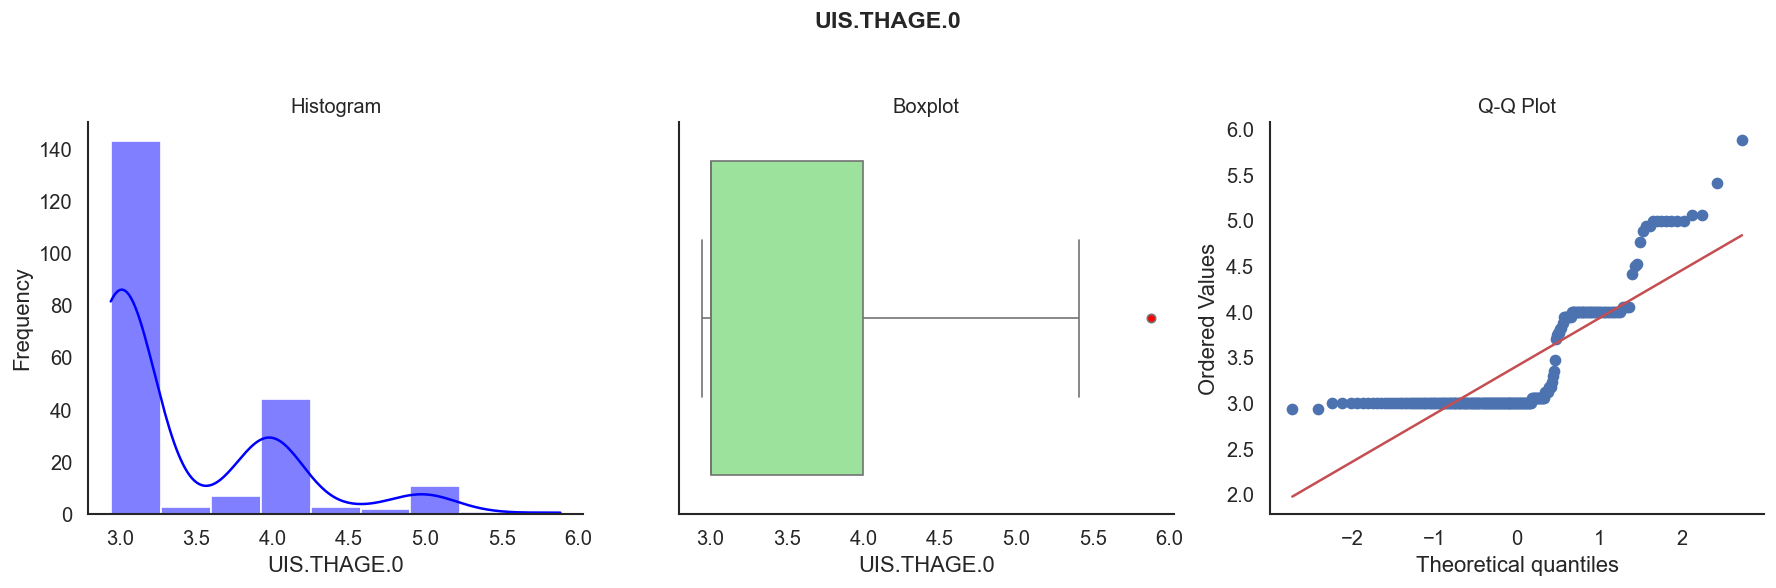

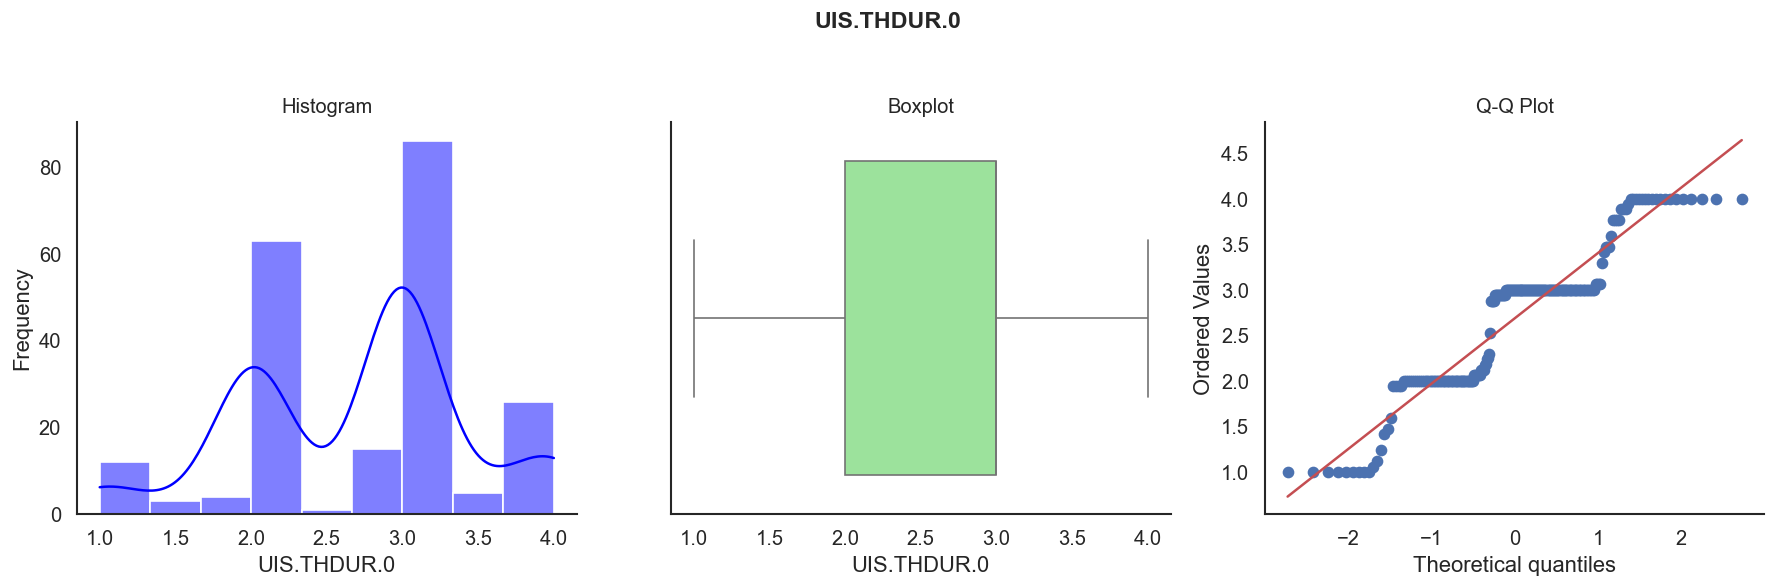

In [66]:
visualise_numeric_features(numerical_df, figsize=(15, 5))

## **Indicator Distributions and Insights for Market Expansion**

* **Primary School Entry Age (SE.PRM.AGES):**
  The distribution is **highly concentrated around age six**, with minor variation (5–7 years). This confirms a **globally consistent entry standard**, simplifying age-based targeting for early education programs.

* **Primary Education Duration (SE.PRM.DURS):**
  Clustered around **five to six years**, with a few shorter or longer cycles. The pattern suggests **predictable primary structures**, enabling scalable learning models across countries.

* **Primary Enrollment (SE.PRM.ENRL):**
  **Strongly right-skewed**, driven by population size differences—larger nations dominate totals. This indicator reflects **market size** rather than performance, making it suitable for scaling analysis.

* **Female Enrollment Share (SE.PRM.ENRL.FE.ZS):**
  Centered near **47–49%**, indicating **balanced gender participation** and **broad parity in access** across primary education globally.

* **Primary Enrollment Rate (SE.PRM.ENRR):**
  Nearly **normal distribution** around **100%**, with a few overperforming countries (>120%), showing **widespread universal primary completion**.

* **Lower Secondary Duration (SE.SEC.DURS.LO):**
  Concentrated between **three and four years**, with a few outliers extending to six. This highlights **regional variation** in lower-secondary structures relevant for curriculum adaptation.

* **Upper Secondary Duration (SE.SEC.DURS.UP):**
  Mostly **two to four years**, with light skewness. This variability supports **flexible high-school program alignment** in global markets.

* **School Life Expectancy (UIS.SLE.1):**
  Displays a **slightly right-skewed normal distribution** around **six years**, reflecting **steady learner progression** and **moderate education continuity**.

* **Tertiary Entry Age (UIS.THAGE.0):**
  Clustered near **3–4 (index units)** with few deviations, showing **standardized tertiary entry patterns**, helpful for **higher education planning**.

* **Tertiary Duration (UIS.THDUR.0):**
  Typically **two to three years**, indicating **globally consistent undergraduate program lengths**—a useful baseline for **international course design**.

---

### **Summary**

Overall, the indicators reveal **high consistency in global education systems**, particularly in primary structures and gender balance.
Variability in **secondary and tertiary levels** suggests opportunities for **localized curriculum design** and **targeted market entry** where flexibility and access differ most.

## The Ready Markets 

## Rescale all the datapoints to avoid bias when ranking 

In [67]:
# Normalise the entire dataset to rank countries per market opportunities 
#Normalised the indicaotors to avoid ranking with single
cols = df_pivot.select_dtypes(include='number').columns.tolist()

def normalise_indicators(col):
    return (col - col.min())/(col.max() - col.min())

for col in cols:
    df_pivot[col] = normalise_indicators(df_pivot[col])

In [68]:
# Columns for the ready market 
ready_market_cols = [ready for ready,_ in ready_market.items()]
ready_market_cols_labels = [ready for _,ready in ready_market.items()]

print(ready_market_cols )

# 
ready_market_df = df_pivot[["Country Name"] + ready_market_cols].copy()

# Equal weights or customize them based on importance
ready_market_df["Readiness_Index"] = (
    0.25 * ready_market_df["SE.SEC.DURS.LO"] +         # Theoretical duration of lower secondary education (years) 
    0.5 * ready_market_df["SE.SEC.DURS"] +             # Theoretical duration of secondary education (years)
    0.25 * ready_market_df["SE.SEC.DURS.UP"]           # Theoretical duration of upper secondary education (years)
)

# 
ready_market_df = (
    ready_market_df.sort_values(by = 'Readiness_Index', ascending=False)
    .reset_index(drop=True)
)

ready_market_df.head(10)

['SE.SEC.DURS.LO', 'SE.SEC.DURS', 'SE.SEC.DURS.UP']


Country Name  SE.SEC.DURS.LO  SE.SEC.DURS  SE.SEC.DURS.UP  Readiness_Index
0                 Germany           1.000        1.000           0.500            0.875
1         Slovak Republic           0.735        0.988           0.750            0.865
2              San Marino           0.250        0.800           1.000            0.713
3          Macedonia, FYR           0.500        0.800           0.750            0.713
4                 Croatia           0.500        0.800           0.750            0.713
5          Czech Republic           0.500        0.800           0.750            0.713
6               Sri Lanka           0.529        0.800           0.721            0.713
7                   Italy           0.250        0.800           1.000            0.713
8  Bosnia and Herzegovina           0.500        0.800           0.750            0.713
9                 Hungary           0.500        0.800           0.750            0.713

## Plot of Top 10 ready market countries 

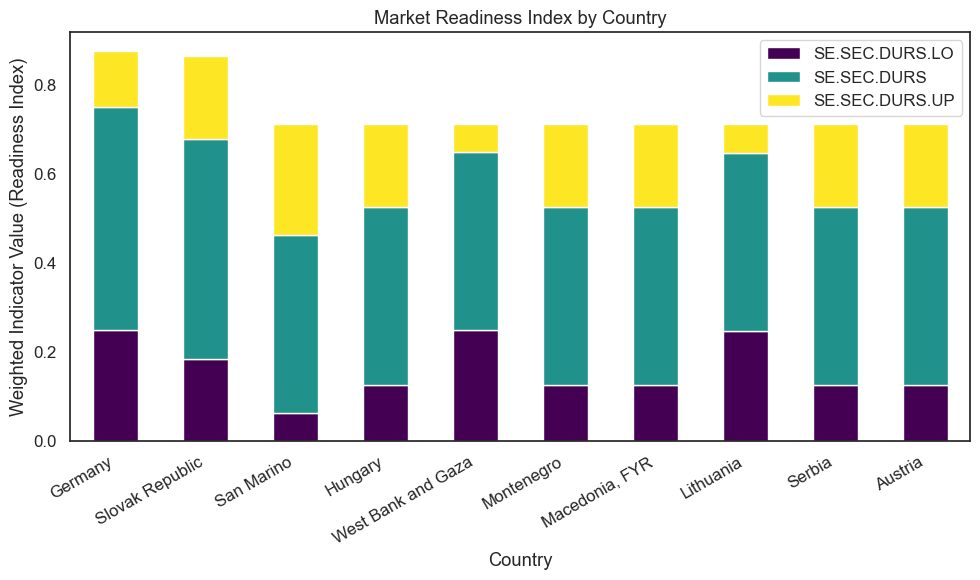

In [69]:
top_countries = (
    ready_market_df
    .sort_values(by="Readiness_Index", ascending=False)
    .set_index('Country Name')
).head(10)

plot_cols = ["SE.SEC.DURS.LO", "SE.SEC.DURS", "SE.SEC.DURS.UP"]
weights = [0.25, 0.5, 0.25]

weighted_df = top_countries[plot_cols].copy()
for col, w in zip(plot_cols, weights):
    weighted_df[col] = weighted_df[col] * w

weighted_df.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")

plt.title("Market Readiness Index by Country")
plt.xlabel("Country")
plt.ylabel("Weighted Indicator Value (Readiness Index)")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


## Potential Market 

In [70]:
# Columns for the ready market 
potential_market_cols = [ready for ready,_ in potential_market.items()]
potential_market_cols_labels = [ready for _,ready in potential_market.items()]

print(potential_market_cols )

potential_market_df = df_pivot[["Country Name"] + potential_market_cols].copy()

# Columns for the potential market
potential_market_cols = [
    "UIS.SLE.1",  # School life expectancy, primary, both sexes (years)
    "SE.PRM.ENRR", # Gross enrolment ratio, primary, both sexes (%)
    "SE.PRM.ENRL.FE.ZS",   # of students in primary education who are female (%)
    "SE.PRM.DURS",   # Theoretical duration of primary education (years)
    "SE.PRM.AGES",  # Official entrance age to primary education (years)
    "UIS.THAGE.0",  # Official entrance age to pre-primary education (years)
    "UIS.THDUR.0"   # Theoretical duration of pre-primary education (years)
]



# Corresponding weights (must sum to 1)
weights = [0.25, 0.25, 0.10, 0.10, 0.10, 0.10, 0.10]


# Create working dataframe
potential_market_df = df_pivot[["Country Name"] + potential_market_cols].copy()

# Compute weighted Potential Index
potential_market_df["Potential_Index"] = sum(
    potential_market_df[col] * w for col, w in zip(potential_market_cols, weights)
)

df_potential = (
    potential_market_df
    .set_index('Country Name')
)
display(df_potential.head())

['UIS.SLE.1', 'SE.PRM.ENRL', 'SE.PRM.ENRR', 'SE.PRM.AGES', 'SE.PRM.ENRL.FE.ZS', 'SE.PRM.DURS', 'UIS.THAGE.0', 'UIS.THDUR.0']


UIS.SLE.1  SE.PRM.ENRR  SE.PRM.ENRL.FE.ZS  SE.PRM.DURS  SE.PRM.AGES  UIS.THAGE.0  UIS.THDUR.0  Potential_Index
Country Name                                                                                                                  
Afghanistan         0.392        0.391              0.000        0.590        0.972         0.02        0.922            0.446
Albania             0.306        0.502              0.863        0.253        0.500         0.02        0.667            0.432
Algeria             0.499        0.550              0.825        0.518        0.500         0.54        0.157            0.516
American Samoa      0.488        0.502              0.891        0.614        0.500         0.02        0.667            0.517
Andorra             0.488        0.502              0.836        0.578        0.500         0.02        0.667            0.508

## Visualising the Top 10 potential Market 

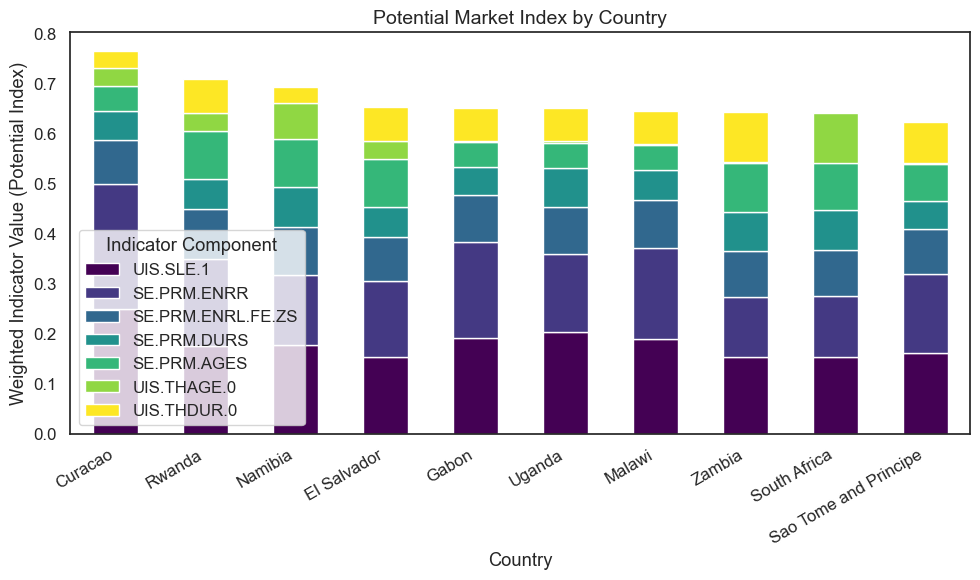

In [71]:
# Select top 10 countries by Potential Index
df_potential = (
    potential_market_df
    .sort_values(by="Potential_Index", ascending=False)
    .head(10)
    .set_index("Country Name")
)

# --- Weighted stacking for visualization ---
weighted_df = df_potential[potential_market_cols].copy()
for col, w in zip(potential_market_cols, weights):
    weighted_df[col] = weighted_df[col] * w

# Plot weighted stacked chart
ax = weighted_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="viridis"
)

plt.title("Potential Market Index by Country", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Weighted Indicator Value (Potential Index)")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Indicator Component")
plt.tight_layout()
plt.show()



### Plotting functions Some selected Indicators 

In [72]:
# Plot function
def visualise_numeric_features_selected(df, columns, x_labels=None, figsize=(12, 5)):
    if not columns:
        print("No columns provided for visualization.")
        return

    n_cols = 2
    n_rows = math.ceil(len(columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows), dpi=120)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(data=df, x=col, ax=axes[i], color="royalblue", kde=True)
        axes[i].set_title(col, fontsize=12, fontweight="bold")
        if x_labels:
            axes[i].set_xlabel(x_labels.get(col, "Indicator Value"), fontsize=10)
        else:
            axes[i].set_xlabel("Indicator Value", fontsize=10)
        axes[i].set_ylabel("Number of Countries", fontsize=10)
        axes[i].tick_params(axis="x", rotation=30)

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    sns.despine()
    plt.tight_layout()
    plt.show()

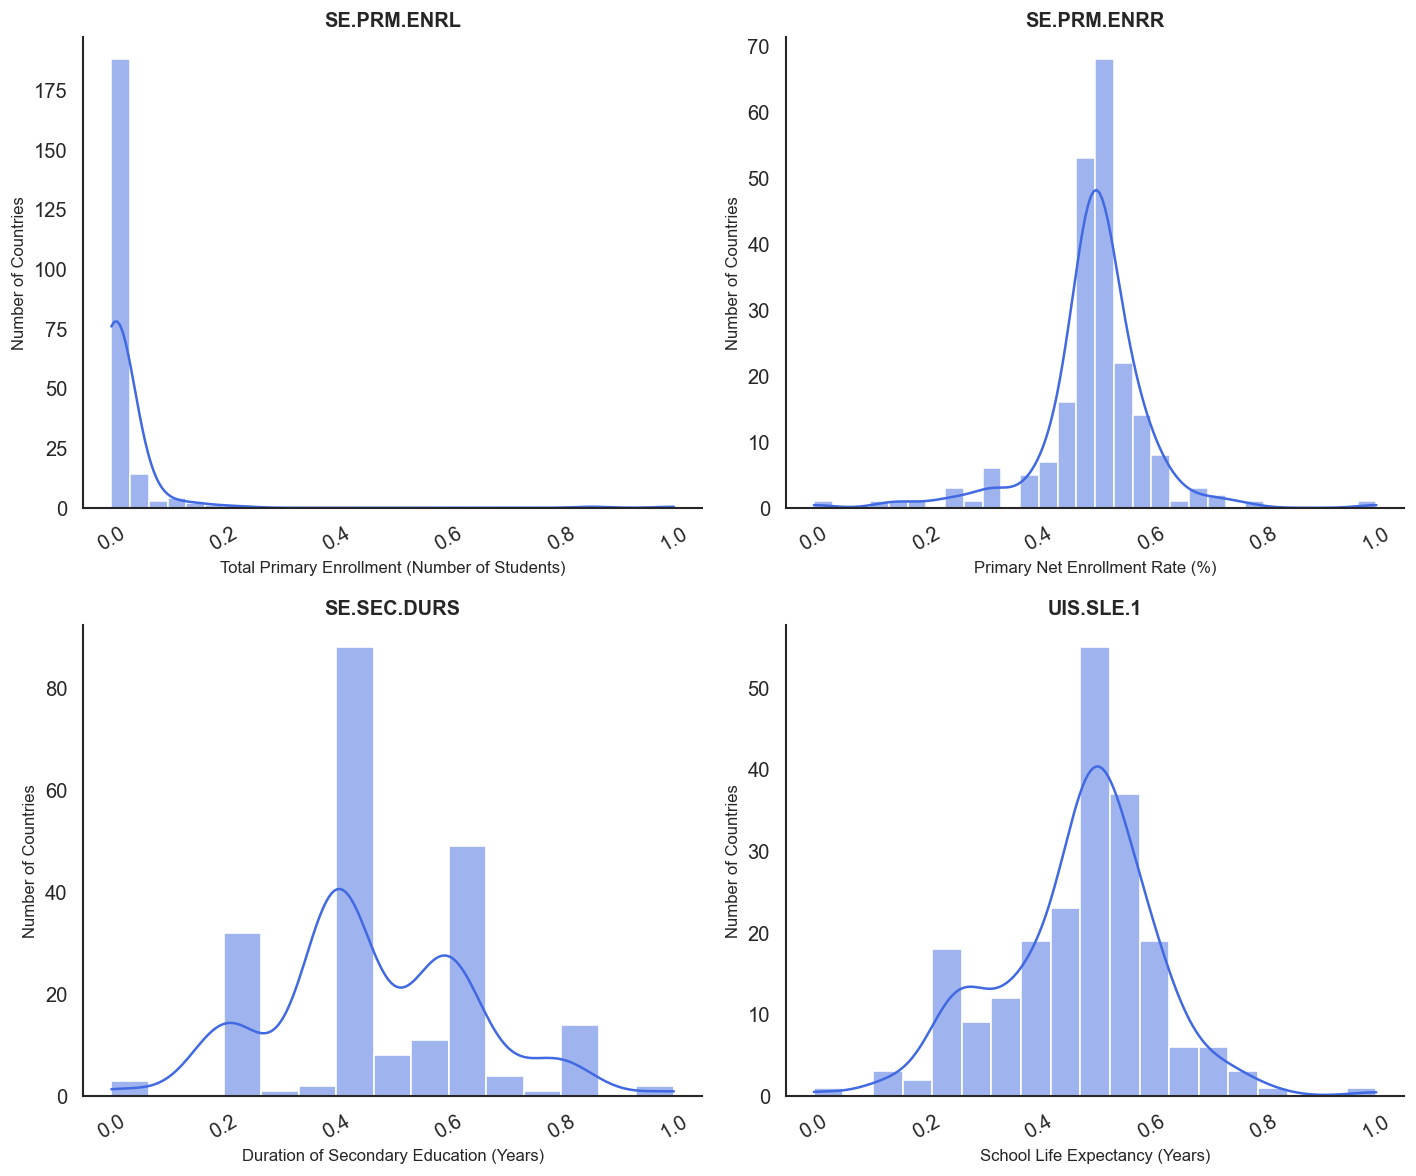

In [73]:
# Visualisation of some selected indices 
x_labels = {
    "SE.PRM.ENRL": "Total Primary Enrollment (Number of Students)",
    "SE.PRM.ENRR": "Primary Net Enrollment Rate (%)",
    "SE.SEC.DURS": "Duration of Secondary Education (Years)",
    "UIS.SLE.1": "School Life Expectancy (Years)"
}

# plots 
Imp_Indicators = ['SE.PRM.ENRL', 'SE.PRM.ENRR', 'SE.SEC.DURS', 'UIS.SLE.1']
df = df_pivot[Imp_Indicators]

visualise_numeric_features_selected(df, Imp_Indicators, x_labels, figsize=(12, 5))

# Insights

## Objective

* Describe the education landscape across countries, and

* Identify potential markets where Academy could expand (based on education demand and digital-learning relevance).


This analysis aimed to evaluate whether World Bank education indicators can provide useful insights to identify countries with strong potential for Academy’s international expansion.


Got it — here’s the same section rewritten **without hyphens**, keeping it smooth, clear, and professional:

---

## **Discussion and Conclusion**

The analysis reveals a globally consistent primary education structure, with entry typically at age six, a duration of five to six years, and near gender parity. This provides a strong foundation for scalable education initiatives.
More variation appears in secondary and tertiary levels, where differences in duration and progression reflect diverse curriculum frameworks and stages of system maturity.

The Market Readiness Index highlights Germany, the Slovak Republic, and San Marino as leading countries with balanced and extended secondary education systems that are well suited for advanced or specialized digital learning programs.
The Potential Market Index identifies Curaçao, Gabon, Malawi, Brazil, and Rwanda as promising growth markets with strong enrollment rates, gender equity, and steady learner progression.

Together, these results suggest that Academy should focus on countries that combine high readiness and strong potential, tailoring strategies as follows:

* **Advanced learning solutions** in mature education systems, such as high-readiness European markets
* **Foundational and secondary-level programs** in emerging markets with expanding participation

Overall, the World Bank education indicators provide sufficient insight to guide Mark’s decisions on online education expansion. The data offers a solid basis for identifying both ready and high-opportunity markets across the world.



In [ ]:
indicators = ["SE.SEC.ENRR"]
ed_long = edstats.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year", value_name="Value"
)
ed_long["Year"] = ed_long["Year"].astype(int)
ed_trend = ed_long[
    (ed_long["Indicator Code"].isin(indicators)) &
    (ed_long["Year"].between(2000, 2015))
]
